# Table of Content

- [1. Improting libraries](#1.0)

- [2. Reading Datasets](#2.0)

- [3. Dataset Overview & Preparation](#3.0)

  - [3.1 Discription of dataset features](#3.1)
  - [3.2 Information of dataset features](#3.2)
  - [3.3 Renaming Features names](#3.3)
  - [3.4 Statistical Analysis](#3.4)

- [4. Exploratary Data Analysis (EDA)](#4.0)

  - [4.1 Age](#4.1)
  - [4.2 Sex](#4.2)
  - [4.3 Chest pain](#4.3)
  - [4.4 Resting blood pressure](#4.4)
  - [4.5 cholesterol](#4.5)
  - [4.6 Fasting blood sugar](#4.6)
  - [4.7 electrocardiographic](#4.7)
  - [4.8 Maximum heart rate](#4.8)
  - [4.9 Exercise induced angina](#4.9)
  - [4.10 old peak](#4.10)
  - [4.11 Slope of peak exercise](#4.11)
  - [4.12 Number major vessels](#4.12)
  - [4.13 stress test](#4.13)
  - [4.14 Heart disease](#4.14)

- [5. Bivariate Analysis](#5.0)

  - [5.1 Numerical data](#5.1)
  - [5.2 Categorical data](#5.2)

- [6.0 Preprocessing](6.0)

  - [6.1 Handling Missing values](#6.1)
  - [6.2 Handling Outlies](#6.2)
  - [6.3 Dublicated rows](#6.3)
  - [6.4 Dublicated columns](#6.4)

- [7.0 Feature selection](#7.0)

  - [7.1 Correlations](#.71)

- [8.0 Feature constuction](#8.0)

- [9.0 Encoding](#9.0)

  - [9.1 Label encoding](#9.1)
  - [9.2 OneHotEnconding](#9.2)

- [10.0 Splitting](#10.0)

- [11.0 SGDClassifier (sgdc)](#11.0)

  - [11.1 Build sgdc Model](#11.1)
  - [11.2 Evaluate sgdc Model](#11.2)

- [12.0 SVMClassifier (svc))](#12.0)

  - [12.1 Build svc Model](12.1)
  - [12.2 Evaluate svc Model](#12.2)

- [13.0 Decision-Trees (DTsC)](#13.0)

  - [13.1 Build DTsC Model](#13.1)
  - [13.2 Evaluate DTsC Model](#13.2)

- [14.0 RandomForestClassifier (RFC)](#14.0)

  - [14.1 Build RFC Model](#14.1)
  - [14.2 Evaluate RFC Model](#14.2)

- [15.0 VottingSystemClassifier (VSC)](#15.0)


# [1. Improting libraries](#1.0)


In [143]:
# algebra
import numpy as np

# dataframes
import pandas as pd

# EDA & visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# log
import math

# spliting and optimizing models
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

# linear model
from sklearn.linear_model import (
    LogisticRegression,
    SGDClassifier,
    Lasso,
    Ridge,
    ElasticNet,
)

# Trees
from sklearn.tree import plot_tree, DecisionTreeClassifier, ExtraTreeClassifier


# Ensembles
from sklearn.ensemble import (
    RandomForestClassifier,
    VotingClassifier,
)

# SVMs
from sklearn.svm import SVC

# Feature preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Model scoring
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    accuracy_score,
    confusion_matrix,
    classification_report,
)

# model pipelining
from sklearn.pipeline import Pipeline

# Selection
from sklearn.feature_selection import (
    chi2,
    VarianceThreshold,
    f_classif,
    SelectKBest,
    SelectPercentile,
    SequentialFeatureSelector,
)

pd.options.display.max_columns = None

# [2. Reading Datasets](#2.0)


In [144]:
heart_df = pd.read_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/Heart-Disease-Prediction/DataSets/heart.csv"
)
heart_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<div style="padding:0px; font-size:7px; border-radius: 10px;">
    <table style="width: 50%; background-color:#f0f8ff;">
        <tr>
            <th style="text-align:center;font-size:20px;"><b>Variable</b></th>
            <th style="text-align:center;font-size:20px;"><b>Description</b></th>
            <th style="text-align:center;font-size:20px;"><b>Data Type</b></th>
        </tr>
        <tr>
            <td style="text-align:center; color:#0f52ba;font-size:15px;"><strong>age</strong></td>
            <td style="text-align:center; color:#0f52ba;font-size:15px;">Age of the patient in years</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Numeric</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>sex</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Gender of the patient:<br>0: female<br>1: male</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Binary</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>cp</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Type of chest pain:<br>0: Typical angina<br>1: Atypical angina<br>2: Non-anginal pain<br>3: Asymptomatic</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Nominal</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>trtbps</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Resting blood pressure in mmHg</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Numeric</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>chol</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Serum cholesterol in mg/dl</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Numeric</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>fbs</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Fasting blood sugar level categorized as above 120 mg/dl:<br>0: false<br>1: true</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Binary</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>restecg</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Resting electrocardiographic results:<br>0: Normal<br>1: Having ST-T wave abnormality<br>2: Showing probable or definite left ventricular hypertrophy</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Nominal</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>thalachh</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Maximum heart rate achieved during a stress test</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Numeric</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>exng</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Exercise induced angina:<br>0: no<br>1: yes</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Binary</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>oldpeak</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">ST depression induced by exercise relative to rest(unit -> depression)</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Numeric</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>slp</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Slope of the peak exercise ST segment:<br>0: Upsloping<br>1: Flat<br>2: Downsloping</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Nominal</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>caa</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Number of major vessels (0-4) colored by fluoroscopy</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Numeric</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>thall</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Thalium stress test result:<br>0: Normal<br>1: Fixed defect<br>2: Reversible defect<br>3: Not described</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Nominal</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>output</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Heart disease status:<br>0: no disease<br>1: presence of disease</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Binary</td>
        </tr>    
    </table>
</div>


# [3. Dataset Overview & Preparation](#3.0)


### [3.1 Discription of dataset features](#3.1)


In [145]:
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: there are Spacing between values of mean between features, so Scaing is important </b><br>
    </span>    
</div>


### [3.2 Information of dataset features](#3.2)


In [146]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: there is no null values</b><br>
        <b>Insight: type of features is correct, and there is no objects, that means that all values is numeric</b><br>
    </span>    
</div>


In [147]:
heart_df.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


### [3.3 Renaming Features names](#3.3)


In [148]:
mapper = {
    "age": "Age",
    "sex": "Sex",
    "cp": "Chest_pain",
    "trtbps": "Resting_blood_pressure",
    "chol": "cholesterol",
    "fbs": "Fasting_blood_sugar",
    "restecg": "electrocardiographic",
    "thalachh": "Maximum_heart_rate",
    "exng": "Exercise_induced_angina",
    "oldpeak": "old_peak",
    "slp": "Slope_of_peak_exercise",
    "caa": "Number_major_vessels",
    "thall": "stress_test",
    "output": "Heart_disease",
}

heart_df.rename(columns=mapper, inplace=True)

In [149]:
heart_df

,Age,Sex,Chest_pain,Resting_blood_pressure,cholesterol,Fasting_blood_sugar,electrocardiographic,Maximum_heart_rate,Exercise_induced_angina,old_peak,Slope_of_peak_exercise,Number_major_vessels,stress_test,Heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### [3.4 Statistical Analysis](#3.4)


In [150]:
for col in heart_df.columns:
    print(
        col,
        " has maximum repeted value precentage = ",
        heart_df[col].value_counts().max() * 100 / len(heart_df[col]),
    )

Age  has maximum repeted value precentage =  6.270627062706271
Sex  has maximum repeted value precentage =  68.31683168316832
Chest_pain  has maximum repeted value precentage =  47.194719471947195
Resting_blood_pressure  has maximum repeted value precentage =  12.211221122112212
cholesterol  has maximum repeted value precentage =  1.9801980198019802
Fasting_blood_sugar  has maximum repeted value precentage =  85.14851485148515
electrocardiographic  has maximum repeted value precentage =  50.165016501650165
Maximum_heart_rate  has maximum repeted value precentage =  3.6303630363036303
Exercise_induced_angina  has maximum repeted value precentage =  67.32673267326733
old_peak  has maximum repeted value precentage =  32.67326732673267
Slope_of_peak_exercise  has maximum repeted value precentage =  46.864686468646866
Number_major_vessels  has maximum repeted value precentage =  57.755775577557756
stress_test  has maximum repeted value precentage =  54.78547854785479
Heart_disease  has maxi

In [151]:
heart_df[["Fasting_blood_sugar"]].value_counts(), heart_df[
    "Sex"
].value_counts(), heart_df["electrocardiographic"].value_counts()

(Fasting_blood_sugar
 0                      258
 1                       45
 Name: count, dtype: int64,
 Sex
 1    207
 0     96
 Name: count, dtype: int64,
 electrocardiographic
 1    152
 0    147
 2      4
 Name: count, dtype: int64)

In [152]:
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
Sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
Chest_pain,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
Resting_blood_pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
Fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
electrocardiographic,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
Maximum_heart_rate,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
Exercise_induced_angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
old_peak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# [4. Exploratary Data Analysis (EDA)](#4.0)


In [153]:
heart_df

,Age,Sex,Chest_pain,Resting_blood_pressure,cholesterol,Fasting_blood_sugar,electrocardiographic,Maximum_heart_rate,Exercise_induced_angina,old_peak,Slope_of_peak_exercise,Number_major_vessels,stress_test,Heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [154]:
mappings = {
    "Sex": {0: "Female", 1: "Male"},
    "Chest_pain": {
        0: "Typical angina",
        1: "Atypical angina",
        2: "Non-anginal pain",
        3: "Asymptomatic",
    },
    "Fasting_blood_sugar": {0: False, 1: True},
    "electrocardiographic": {0: "Normal", 1: "Abnormality", 2: "Hypertrophy"},
    "Exercise_induced_angina": {0: "No", 1: "Yes"},
    "Slope_of_peak_exercise": {0: "Upsloping", 1: "Flat", 2: "Downsloping"},
    "stress_test": {
        0: "Normal",
        1: "Fixed defect",
        2: "Reversible defect",
        3: "Not described",
    },
    "Heart_disease": {0: "No Disease", 1: "Heart Disease"},
}


plot_datset = heart_df


def map_values(x, mapping):
    return mapping.get(x, x)


for feature, mapping in mappings.items():
    plot_datset[feature] = plot_datset[feature].map(lambda x: map_values(x, mapping))
    plot_datset[feature] = plot_datset[feature].astype(object)


plot_datset

,Age,Sex,Chest_pain,Resting_blood_pressure,cholesterol,Fasting_blood_sugar,electrocardiographic,Maximum_heart_rate,Exercise_induced_angina,old_peak,Slope_of_peak_exercise,Number_major_vessels,stress_test,Heart_disease
0,63,Male,Asymptomatic,145,233,True,Normal,150,No,2.3,Upsloping,0,Fixed defect,Heart Disease
1,37,Male,Non-anginal pain,130,250,False,Abnormality,187,No,3.5,Upsloping,0,Reversible defect,Heart Disease
2,41,Female,Atypical angina,130,204,False,Normal,172,No,1.4,Downsloping,0,Reversible defect,Heart Disease
3,56,Male,Atypical angina,120,236,False,Abnormality,178,No,0.8,Downsloping,0,Reversible defect,Heart Disease
4,57,Female,Typical angina,120,354,False,Abnormality,163,Yes,0.6,Downsloping,0,Reversible defect,Heart Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,Typical angina,140,241,False,Abnormality,123,Yes,0.2,Flat,0,Not described,No Disease
299,45,Male,Asymptomatic,110,264,False,Abnormality,132,No,1.2,Flat,0,Not described,No Disease
300,68,Male,Typical angina,144,193,True,Abnormality,141,No,3.4,Flat,2,Not described,No Disease
301,57,Male,Typical angina,130,131,False,Abnormality,115,Yes,1.2,Flat,1,Not described,No Disease


### Mehodes


In [155]:
def skewness(feature):
    skew = heart_df[feature].skew()
    print("Skewness of the ", feature, " = ", skew)
    if skew > 0:
        print("The distribution is right-skewed.")
    elif skew < 0:
        print("The distribution is left-skewed.")
    else:
        print("The distribution is approximately symmetric.")
    return

In [156]:
def get_outliers(feature):
    Q1 = heart_df[feature].quantile(0.25)
    Q2 = heart_df[feature].quantile(0.75)
    iqr = Q2 - Q1
    lower_limit = Q1 - 1.5 * iqr
    upper_limit = Q2 + 1.5 * iqr
    IQR_df = heart_df[
        (heart_df[feature] < lower_limit) | (heart_df[feature] > upper_limit)
    ]

    print("lower_limit = ", lower_limit)
    print("upper_limit = ", upper_limit)
    print("number of outliers = ", len(IQR_df))

In [157]:
def box_plot(feature):
    if plot_datset[feature].dtype != "O":
        mean_value = plot_datset[feature].mean()
        median_value = plot_datset[feature].median()
        mode_value = plot_datset[feature].mode().values[0]
        std_value = plot_datset[feature].std()
        min_value = plot_datset[feature].min()
        max_value = plot_datset[feature].max()
    plt.figure(figsize=(8, 4))
    plt.rcParams["axes.facecolor"] = "#D6F3FF"
    sns.boxplot(data=plot_datset, x=feature, color="#45b1e8")
    if plot_datset[feature].dtype != "O":
        plt.axvline(
            mean_value,
            color="b",
            linestyle="--",
            linewidth=1.5,
        )
        plt.axvline(
            median_value,
            color="r",
            linestyle="--",
            linewidth=1.5,
        )
        plt.axvline(
            std_value + mean_value,
            color="black",
            linestyle="--",
            linewidth=1.5,
        )
        plt.axvline(
            mean_value - std_value,
            color="black",
            linestyle="--",
            linewidth=1.5,
        )
        plt.axvline(
            min_value,
            color="yellow",
            linestyle="--",
            linewidth=1.5,
        )
        plt.axvline(
            max_value,
            color="orange",
            linestyle="--",
            linewidth=1.5,
        )
        plt.axvline(
            mode_value,
            color="b",
            linestyle="--",
            linewidth=1.5,
        )
    plt.title(feature + " box plot")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [158]:
def histgram(feature):
    if plot_datset[feature].dtype != "O":
        mean_value = plot_datset[feature].mean()
        median_value = plot_datset[feature].median()
        mode_value = plot_datset[feature].mode().values[0]
        std_value = plot_datset[feature].std()
        min_value = plot_datset[feature].min()
        max_value = plot_datset[feature].max()
    plt.figure(figsize=(8, 4))
    plt.rcParams["axes.facecolor"] = "#D6F3FF"
    sns.histplot(data=plot_datset, x=feature, kde=True, color="#45b1e8")

    if plot_datset[feature].dtype != "O":
        plt.axvline(
            mean_value, color="b", linestyle="--", linewidth=1.5, label="mean value"
        )
        plt.axvline(
            median_value, color="r", linestyle="--", linewidth=1.5, label="mean value"
        )
        plt.axvline(
            std_value + mean_value,
            color="black",
            linestyle="--",
            linewidth=1.5,
            label="std value + mean value",
        )
        plt.axvline(
            mean_value - std_value,
            color="black",
            linestyle="--",
            linewidth=1.5,
            label="mean_value - std_value",
        )
        plt.axvline(
            min_value, color="yellow", linestyle="--", linewidth=1.5, label="min value"
        )
        plt.axvline(
            max_value, color="orange", linestyle="--", linewidth=1.5, label="max value"
        )
        plt.axvline(
            mode_value, color="b", linestyle="--", linewidth=1.5, label="mode value"
        )
    plt.title(feature + " box plot")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [159]:
def bar_chart(feature):
    fig, axs = plt.subplots(1, 1, figsize=(5, 3))
    category_counts = plot_datset[feature].value_counts()

    bars = axs.barh(category_counts.index, category_counts.values, color="#45b1e8")
    for bar, values in zip(bars, category_counts):
        width = bar.get_width()
        axs.text(
            width,
            bar.get_y() + bar.get_height() / 2,
            int(width),
            ha="left",
            va="center",
            color="black",
            fontsize=10,
        )

    plt.title(feature + " bar plot")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [160]:
def pie_chart(feature):

    plt.figure(figsize=(6, 5))

    category_counts = plot_datset[feature].value_counts()

    plt.pie(
        category_counts,
        labels=category_counts.index,
        shadow=True,
        wedgeprops={"edgecolor": "black"},
        startangle=0,
        autopct="%3.2f%%",
        radius=1.6,
        textprops={"fontsize": 12},
        colors=sns.color_palette("rocket"),
    )
    plt.pie(
        x=category_counts,
        radius=1.2,
        colors="w",
        wedgeprops={"edgecolor": "white"},
    )
    plt.legend()
    plt.tight_layout()
    plt.show()

### [4.1 Age](#4.1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


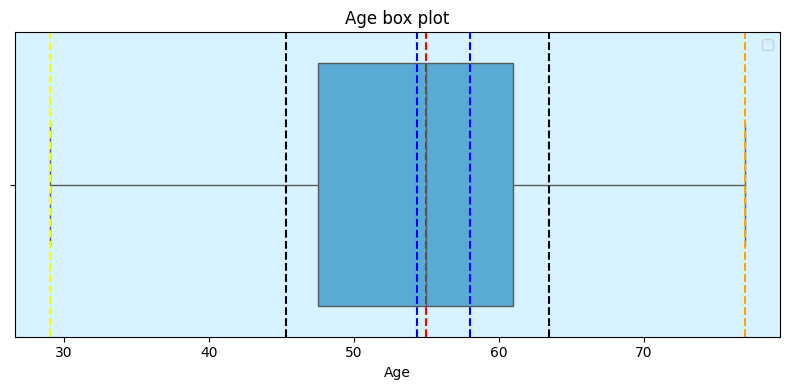

In [161]:
box_plot("Age")

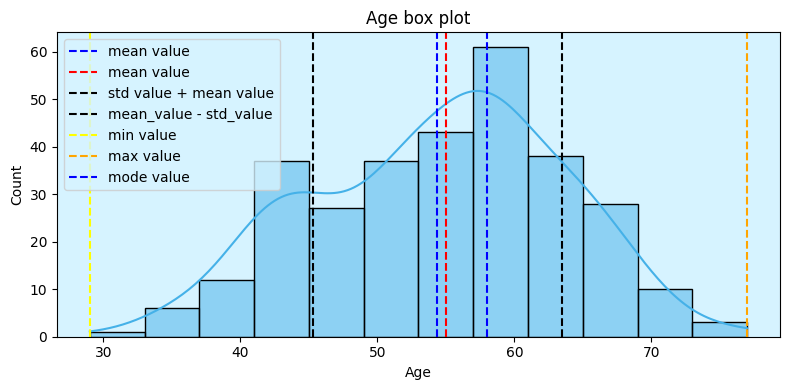

Skewness of the  Age  =  -0.2024633654856539
The distribution is left-skewed.


In [162]:
histgram("Age")
skewness("Age")

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: mean ages is about 55 years old</b><br>
        <b>Insight: the most common is 58 years. It shows the age with the highest frequency</b><br>
    </span>    
</div>


In [163]:
get_outliers("Age")

lower_limit =  27.25
upper_limit =  81.25
number of outliers =  0


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: There is no outliers</b><br>
    </span>    
</div>


### [4.2 Sex](#4.2)


In [164]:
heart_df["Sex"].value_counts()

Sex
Male      207
Female     96
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


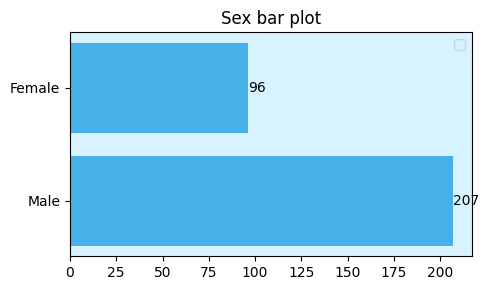

In [165]:
bar_chart("Sex")

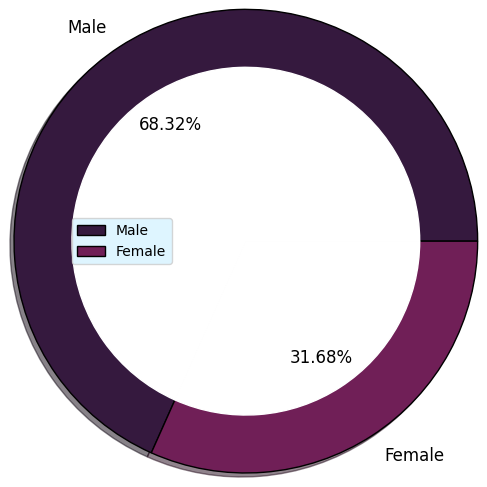

In [166]:
pie_chart("Sex")

### [4.3 Chest pain](#4.3)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


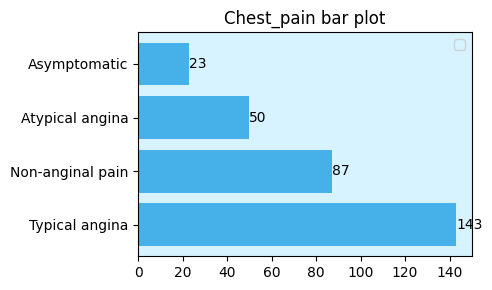

In [167]:
bar_chart("Chest_pain")

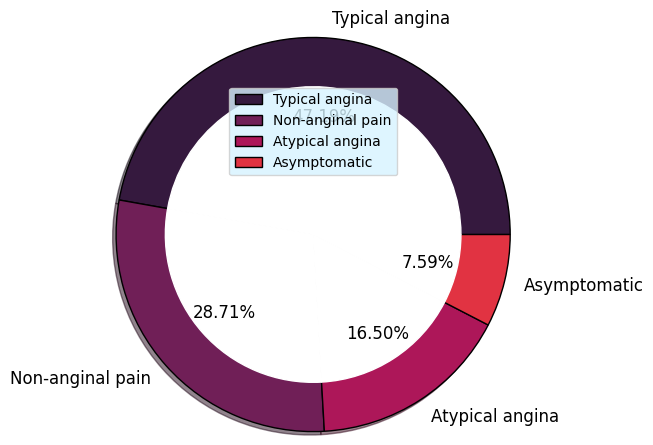

In [168]:
pie_chart("Chest_pain")

### [4.4 Resting blood pressure](#4.4)


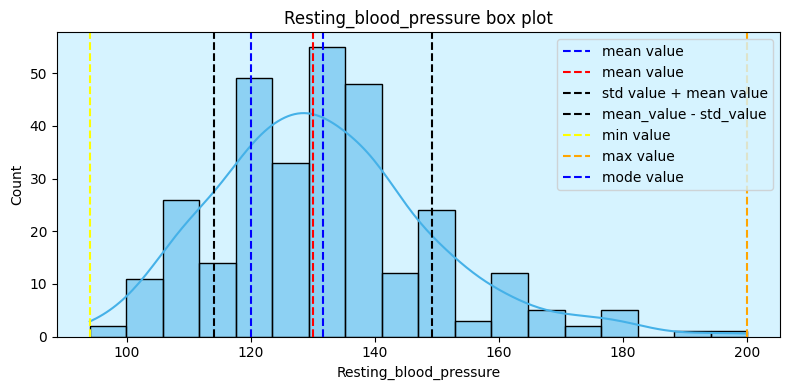

In [169]:
histgram("Resting_blood_pressure")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


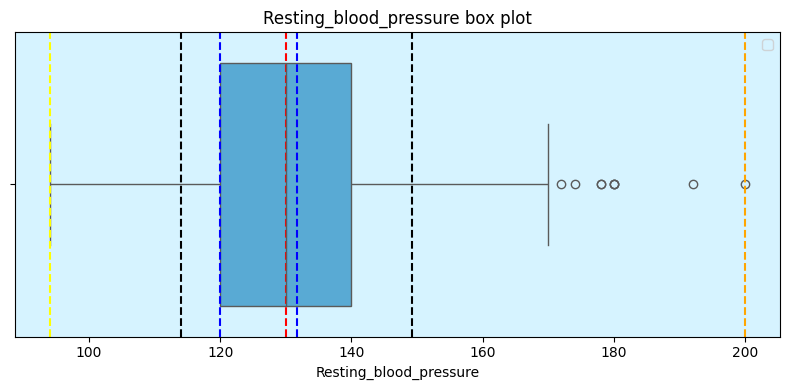

In [170]:
box_plot("Resting_blood_pressure")

In [171]:
skewness("Resting_blood_pressure")

Skewness of the  Resting_blood_pressure  =  0.7137684379181465
The distribution is right-skewed.


In [172]:
get_outliers("Resting_blood_pressure")

lower_limit =  90.0
upper_limit =  170.0
number of outliers =  9


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b> Mean: The average resting blood pressure is 131.62 mmHg</b><br>
        <b> Median: At 130 mmHg, this value divides the dataset into two halves</b><br>
        <b> Mode: The most frequent blood pressure is 120 mmHg</b><br>
        <b> STD: With a value of 17.54 mmHg, it measures the spread of blood pressures around the mean</b><br>
        <b> the minimum resting blood pressure recorded is 94 mmHg, and the maximum is 200 mmHg </b><br>
        <b> There is 13 outliers data points </b><br>
        <b> The distribution is right-skewed </b><br>
    </span>    
</div>


### [4.5 cholesterol](#4.5)


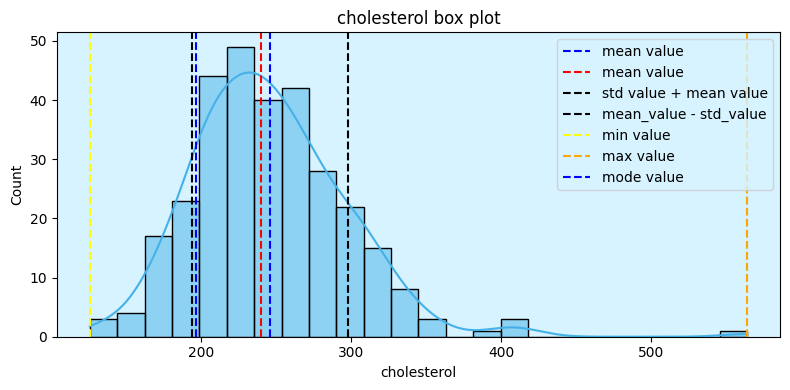

In [173]:
histgram("cholesterol")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


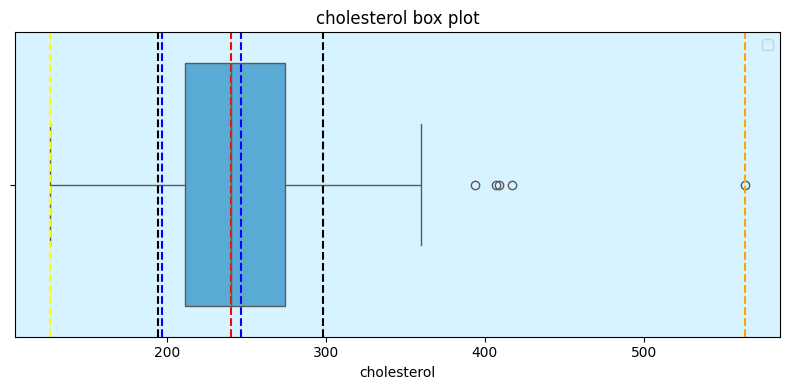

In [174]:
box_plot("cholesterol")

In [175]:
skewness("cholesterol")

Skewness of the  cholesterol  =  1.1434008206693387
The distribution is right-skewed.


In [176]:
get_outliers("cholesterol")

lower_limit =  115.75
upper_limit =  369.75
number of outliers =  5


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b> Mean: The average cholesterol level is 246.26</b><br>
        <b> Median: The median cholesterol level is 240</b><br>
        <b> Mode: The most frequent cholesterol level is 197</b><br>
        <b> STD: With a value of 17.54 mmHg, it measures the spread of cholesterol around the mean</b><br>
        <b> There is 5 outliers data points </b><br>
        <b> The distribution is right-skewed </b><br>
    </span>    
</div>


### [4.6 Fasting blood sugar](#4.6)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


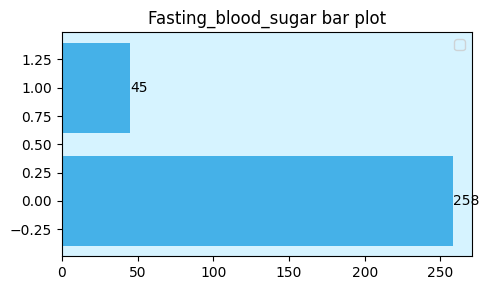

In [177]:
bar_chart("Fasting_blood_sugar")

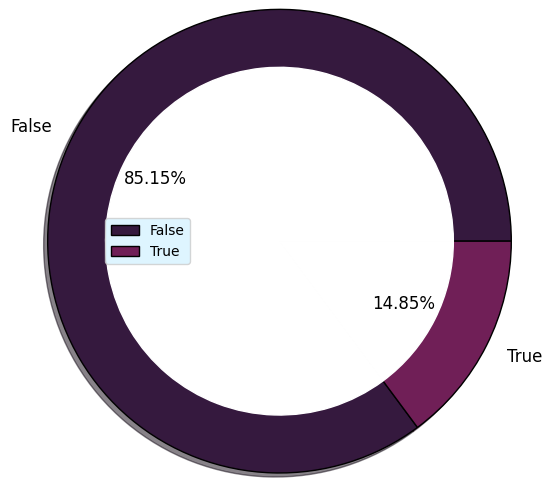

In [178]:
pie_chart("Fasting_blood_sugar")

### [4.7 electrocardiographic](#4.7)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


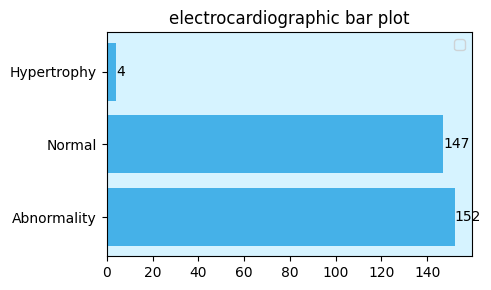

In [179]:
bar_chart("electrocardiographic")

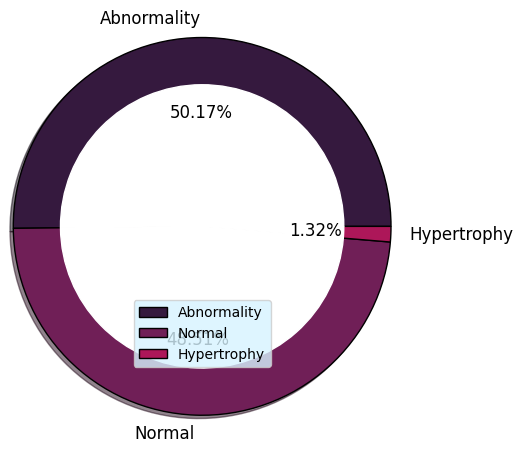

In [180]:
pie_chart("electrocardiographic")

### [4.8 Maximum heart rate](#4.8)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


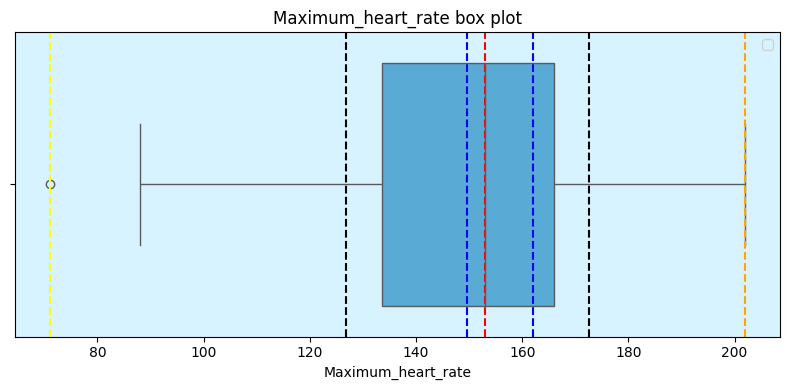

In [181]:
box_plot("Maximum_heart_rate")

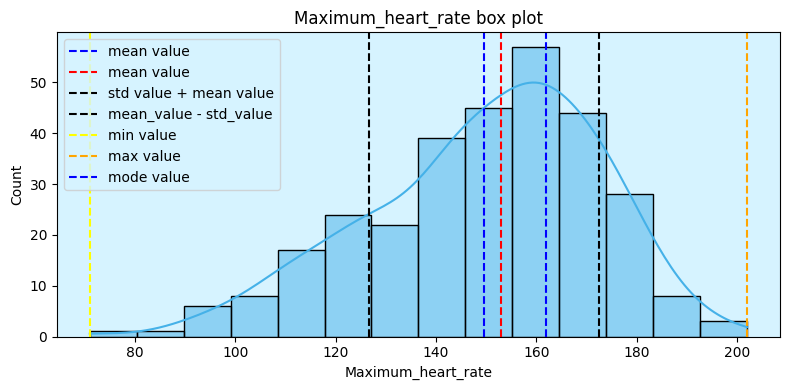

In [182]:
histgram("Maximum_heart_rate")

In [183]:
skewness("Maximum_heart_rate")

Skewness of the  Maximum_heart_rate  =  -0.5374096526832253
The distribution is left-skewed.


In [184]:
get_outliers("Maximum_heart_rate")

lower_limit =  84.75
upper_limit =  214.75
number of outliers =  1


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b> Mean: The average maximum heart rate is 149.65</b><br>
        <b> Median: The median maximum heart rate is 153</b><br>
        <b> Mode: The most frequent maximum heart rate is 162</b><br>
        <b> STD: With a value of 22.91, it measures the spread of cholesterol around the mean</b><br>
        <b> There is 1 outliers data points </b><br>
        <b> The distribution is left-skewed </b><br>
    </span>    
</div>


### [4.9 Exercise induced angina](#4.9)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


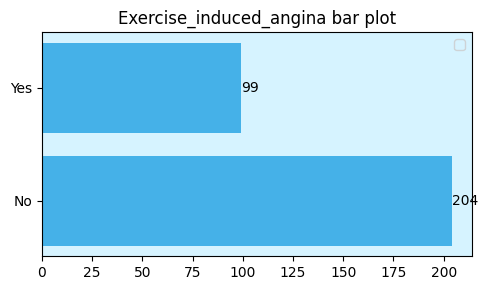

In [185]:
bar_chart("Exercise_induced_angina")

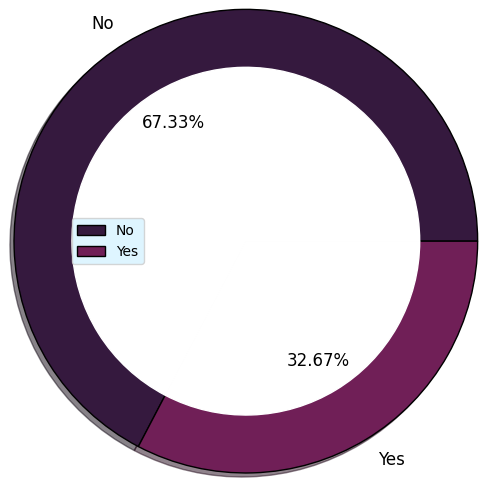

In [186]:
pie_chart("Exercise_induced_angina")

### [4.10 old peak](#4.10)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


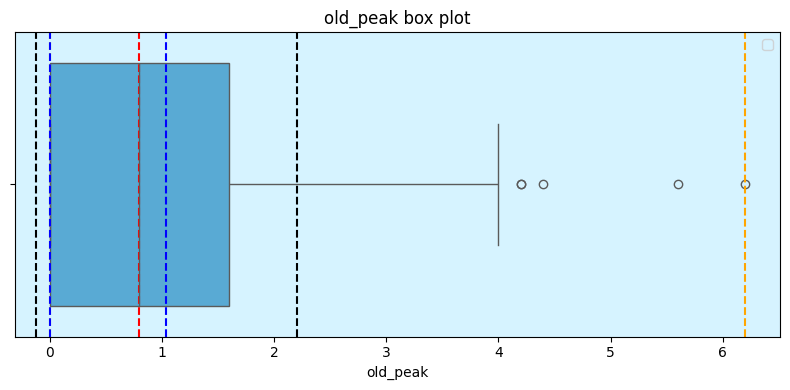

In [187]:
box_plot("old_peak")

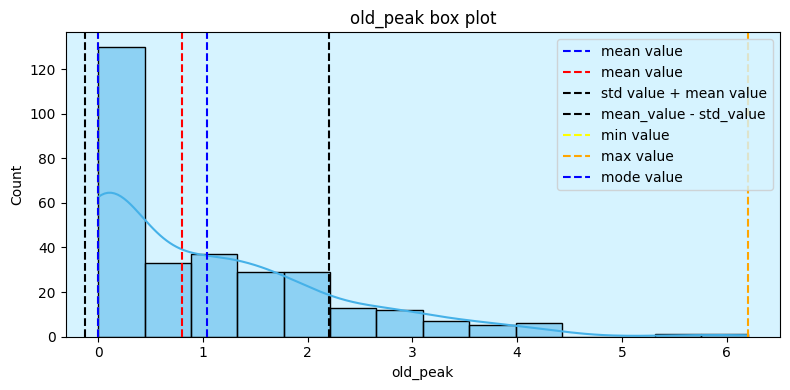

In [188]:
histgram("old_peak")

In [189]:
skewness("old_peak")

Skewness of the  old_peak  =  1.269719930601997
The distribution is right-skewed.


In [190]:
get_outliers("old_peak")

lower_limit =  -2.4000000000000004
upper_limit =  4.0
number of outliers =  5


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b> Mean: The average OldPeak value is 1.04</b><br>
        <b> Median: The median OldPeak value is 0.80</b><br>
        <b> Mode: The most frequent OldPeak value is 0.00</b><br>
        <b> STD: With a value of 1.16, it measures the spread of cholesterol around the mean</b><br>
        <b> There is 5 outliers data points </b><br>
        <b> The distribution is right-skewed </b><br>
    </span>    
</div>


### [4.11 Slope of peak exercise](#4.11)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


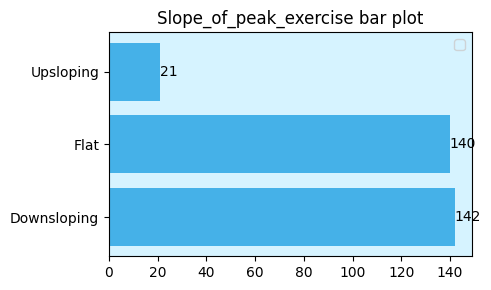

In [191]:
bar_chart("Slope_of_peak_exercise")

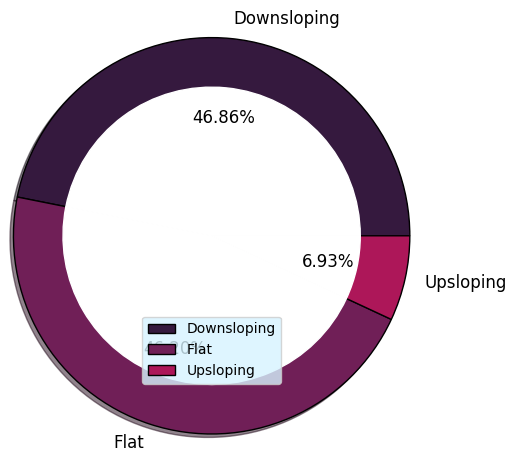

In [192]:
pie_chart("Slope_of_peak_exercise")

### [4.12 Number major vessels](#4.12)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


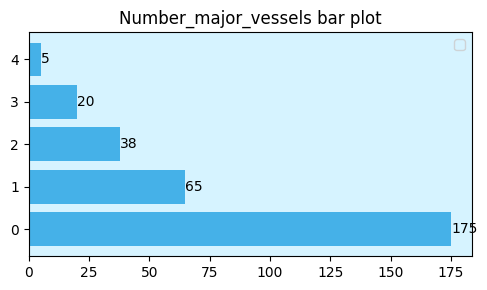

In [193]:
bar_chart("Number_major_vessels")

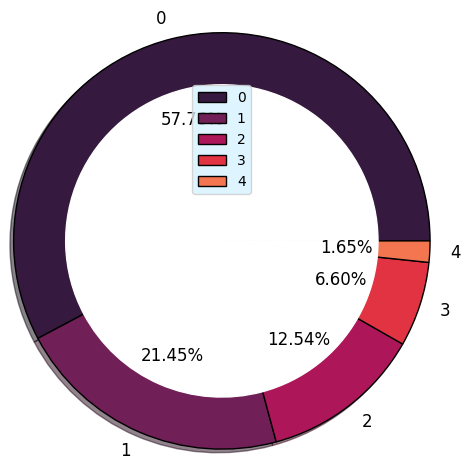

In [194]:
pie_chart("Number_major_vessels")

### [4.13 stress test](#4.13)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


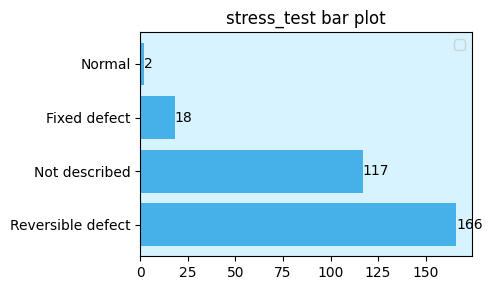

In [195]:
bar_chart("stress_test")

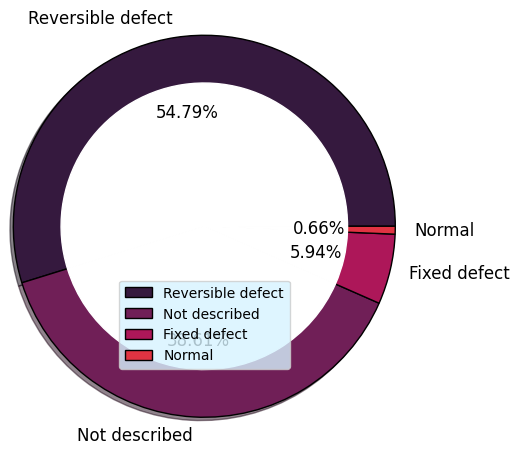

In [196]:
pie_chart("stress_test")

### [4.14 Heart disease](#4.14)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


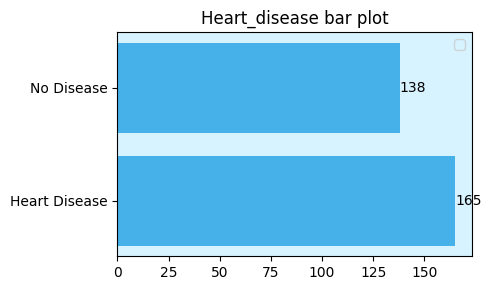

In [197]:
bar_chart("Heart_disease")

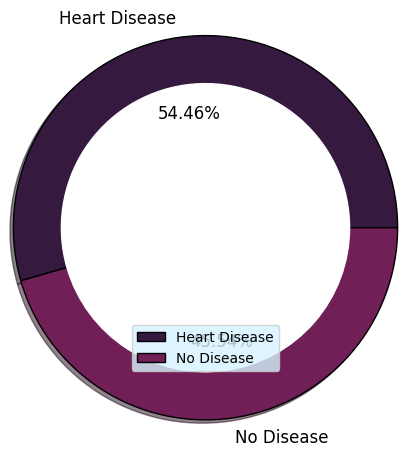

In [198]:
pie_chart("Heart_disease")

# [5. Bivariate Analysis](#5.0)


### [5.1 Numerical data](#5.1)


In [199]:
numerical_columns = []

for col in plot_datset.columns:
    if plot_datset[col].dtype != "O":
        numerical_columns.append(col)
numerical_columns.remove("Number_major_vessels")
numerical_columns

['Age',
 'Resting_blood_pressure',
 'cholesterol',
 'Maximum_heart_rate',
 'old_peak']

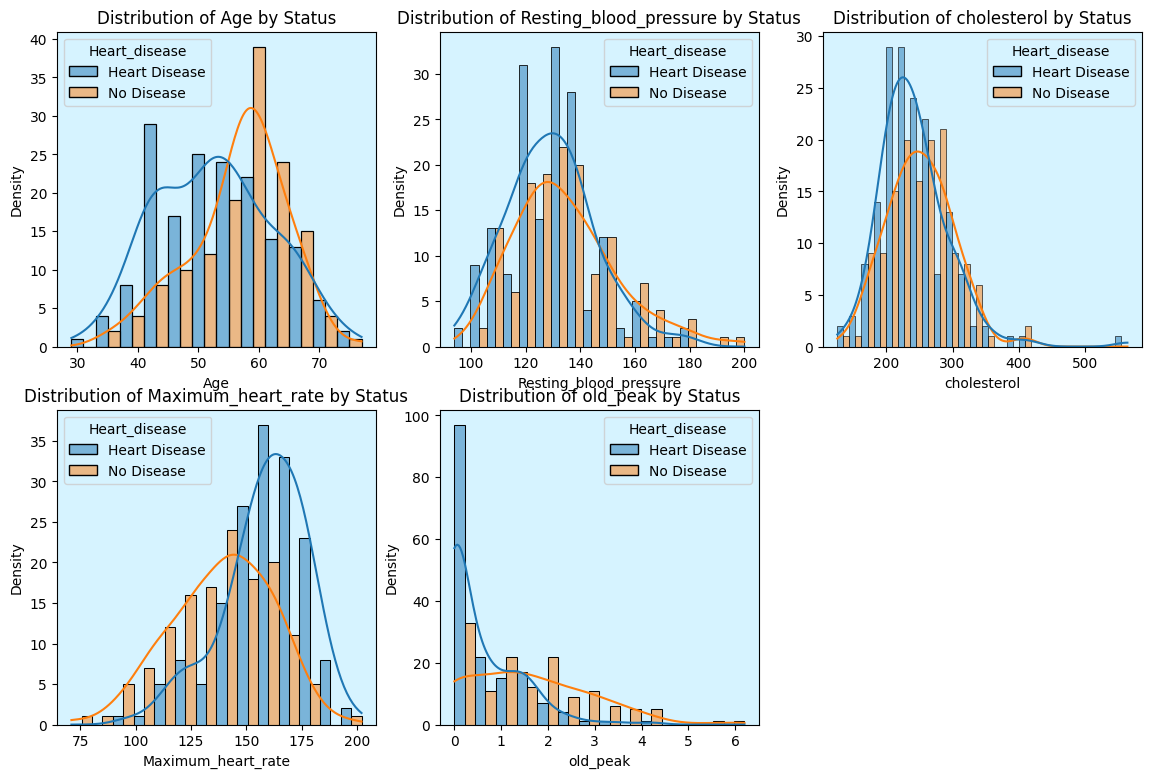

In [200]:
fig, axe = plt.subplots(2, 3, figsize=(14, 9))

for i, feature in enumerate(numerical_columns):

    row = i // 3
    col = i % 3
    ax = axe[row, col]

    sns.histplot(
        data=plot_datset,
        x=feature,
        hue="Heart_disease",
        kde=True,
        ax=ax,
        multiple="dodge",
    )
    ax.set_title(f"Distribution of {feature} by Status")
    ax.set_xlabel(feature)
    ax.set_ylabel("Density")

axe[1, 2].remove()
plt.show()

### [5.2 Categorical data](#5.2)


In [201]:
Categorical_columns = []

for col in plot_datset.columns:
    if plot_datset[col].dtype == "O":
        Categorical_columns.append(col)
Categorical_columns.append("Number_major_vessels")
Categorical_columns.remove("Heart_disease")
Categorical_columns

['Sex',
 'Chest_pain',
 'Fasting_blood_sugar',
 'electrocardiographic',
 'Exercise_induced_angina',
 'Slope_of_peak_exercise',
 'stress_test',
 'Number_major_vessels']

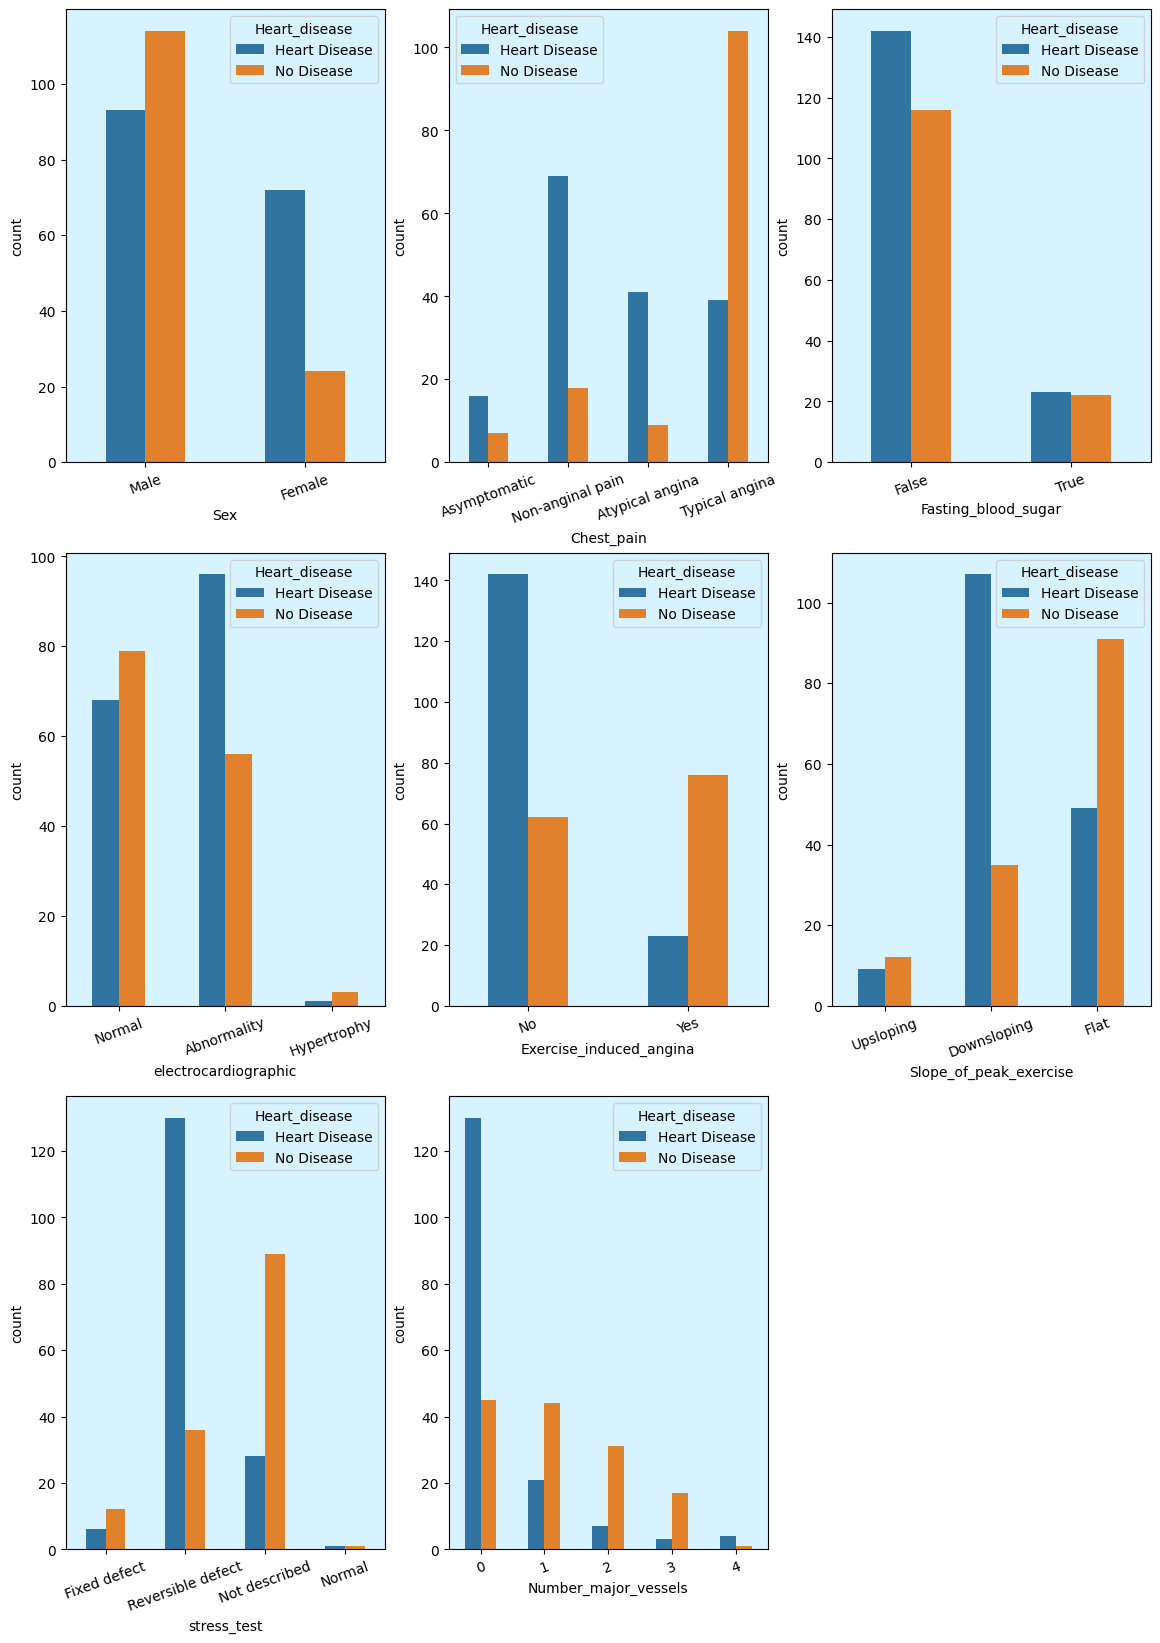

In [202]:
fig, axe = plt.subplots(3, 3, figsize=(14, 20))

for i, feature in enumerate(Categorical_columns):

    row = i // 3
    col = i % 3
    ax = axe[row, col]

    sns.countplot(data=plot_datset, x=feature, hue="Heart_disease", ax=ax, width=0.5)
    ax.set_ylabel("count")
    ax.tick_params(axis="x", rotation=20)
axe[2, 2].remove()

plt.show()

In [203]:
heart_df = plot_datset
heart_df

,Age,Sex,Chest_pain,Resting_blood_pressure,cholesterol,Fasting_blood_sugar,electrocardiographic,Maximum_heart_rate,Exercise_induced_angina,old_peak,Slope_of_peak_exercise,Number_major_vessels,stress_test,Heart_disease
0,63,Male,Asymptomatic,145,233,True,Normal,150,No,2.3,Upsloping,0,Fixed defect,Heart Disease
1,37,Male,Non-anginal pain,130,250,False,Abnormality,187,No,3.5,Upsloping,0,Reversible defect,Heart Disease
2,41,Female,Atypical angina,130,204,False,Normal,172,No,1.4,Downsloping,0,Reversible defect,Heart Disease
3,56,Male,Atypical angina,120,236,False,Abnormality,178,No,0.8,Downsloping,0,Reversible defect,Heart Disease
4,57,Female,Typical angina,120,354,False,Abnormality,163,Yes,0.6,Downsloping,0,Reversible defect,Heart Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,Typical angina,140,241,False,Abnormality,123,Yes,0.2,Flat,0,Not described,No Disease
299,45,Male,Asymptomatic,110,264,False,Abnormality,132,No,1.2,Flat,0,Not described,No Disease
300,68,Male,Typical angina,144,193,True,Abnormality,141,No,3.4,Flat,2,Not described,No Disease
301,57,Male,Typical angina,130,131,False,Abnormality,115,Yes,1.2,Flat,1,Not described,No Disease


# [6.0 Preprocessing](6.0)


### [6.1 Handling Missing values](#6.1)


In [204]:
null_columns = []

for col in heart_df.columns:

    if heart_df[col].isna().sum() > 0:
        null_columns.append(col)
print(len(null_columns))

0


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>There is no null columns </b><br>
    </span>    
</div>


### [6.2 Handling Outlies](#6.2)


In [205]:
def get_outliers(feature):

    Q1 = heart_df[feature].quantile(0.25)
    Q2 = heart_df[feature].quantile(0.75)
    iqr = Q2 - Q1
    lower_limit = Q1 - 1.5 * iqr
    upper_limit = Q2 + 1.5 * iqr
    IQR_df = heart_df[
        (heart_df[feature] < lower_limit) | (heart_df[feature] > upper_limit)
    ]

    return (len(IQR_df)), lower_limit, upper_limit

In [206]:
null_columns = []

len_before = len(heart_df)

for feature in heart_df.columns:
    if heart_df[feature].dtype == "O" or heart_df[feature].dtype == "bool":
        continue
    out_liers, lower_limit, upper_limit = get_outliers(feature)
    print(out_liers)
    if out_liers > 0:
        heart_df = heart_df[
            (heart_df[feature] >= lower_limit) & (heart_df[feature] <= upper_limit)
        ]

len_after = len(heart_df)

print("len before = ", len_before)
print("len after = ", len_after)

heart_df

0
9
5
1
4
21
len before =  303
len after =  263


,Age,Sex,Chest_pain,Resting_blood_pressure,cholesterol,Fasting_blood_sugar,electrocardiographic,Maximum_heart_rate,Exercise_induced_angina,old_peak,Slope_of_peak_exercise,Number_major_vessels,stress_test,Heart_disease
0,63,Male,Asymptomatic,145,233,True,Normal,150,No,2.3,Upsloping,0,Fixed defect,Heart Disease
1,37,Male,Non-anginal pain,130,250,False,Abnormality,187,No,3.5,Upsloping,0,Reversible defect,Heart Disease
2,41,Female,Atypical angina,130,204,False,Normal,172,No,1.4,Downsloping,0,Reversible defect,Heart Disease
3,56,Male,Atypical angina,120,236,False,Abnormality,178,No,0.8,Downsloping,0,Reversible defect,Heart Disease
4,57,Female,Typical angina,120,354,False,Abnormality,163,Yes,0.6,Downsloping,0,Reversible defect,Heart Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,Typical angina,140,241,False,Abnormality,123,Yes,0.2,Flat,0,Not described,No Disease
299,45,Male,Asymptomatic,110,264,False,Abnormality,132,No,1.2,Flat,0,Not described,No Disease
300,68,Male,Typical angina,144,193,True,Abnormality,141,No,3.4,Flat,2,Not described,No Disease
301,57,Male,Typical angina,130,131,False,Abnormality,115,Yes,1.2,Flat,1,Not described,No Disease


### [6.3 Dublicated rows](#6.3)


In [207]:
dublicated = heart_df.duplicated()
heart_df[dublicated]

,Age,Sex,Chest_pain,Resting_blood_pressure,cholesterol,Fasting_blood_sugar,electrocardiographic,Maximum_heart_rate,Exercise_induced_angina,old_peak,Slope_of_peak_exercise,Number_major_vessels,stress_test,Heart_disease


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>There is no Dublicated rows</b><br>
    </span>    
</div>


### [6.4 Dublicated columns](#6.4)


In [208]:
def get_duplicate_columns(df=pd.DataFrame):

    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [209]:
duplicate_columns = get_duplicate_columns(
    heart_df.drop(columns=["Heart_disease"], axis=1)
)
duplicate_columns

{}

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>There is no Dublicated columns</b><br>
    </span>    
</div>


# [7.0 Feature selection](#7.0)


### - [7.1 Correlations](#7.1)


In [210]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

Transformed_columns = []

for feature in heart_df.columns:
    if (
        heart_df[feature].dtype == "O" or heart_df[feature].dtype == "bool"
    ) and feature != "Heart_disease":
        Transformed_columns.append(feature)

T_df = heart_df[Transformed_columns].copy()


ORE = OrdinalEncoder()
T_df = pd.DataFrame(ORE.fit_transform(T_df), columns=Transformed_columns)

for col in heart_df.columns:
    if Transformed_columns.count(col) == 0 and col != "Heart_disease":
        T_df[col] = heart_df[col].copy()
T_df

T_df

,Sex,Chest_pain,Fasting_blood_sugar,electrocardiographic,Exercise_induced_angina,Slope_of_peak_exercise,stress_test,Age,Resting_blood_pressure,cholesterol,Maximum_heart_rate,old_peak,Number_major_vessels
0,1.0,0.0,1.0,2.0,0.0,2.0,0.0,63.0,145.0,233.0,150.0,2.3,0.0
1,1.0,2.0,0.0,0.0,0.0,2.0,3.0,37.0,130.0,250.0,187.0,3.5,0.0
2,0.0,1.0,0.0,2.0,0.0,0.0,3.0,41.0,130.0,204.0,172.0,1.4,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,3.0,56.0,120.0,236.0,178.0,0.8,0.0
4,0.0,3.0,0.0,0.0,1.0,0.0,3.0,57.0,120.0,354.0,163.0,0.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0.0,3.0,0.0,0.0,1.0,1.0,2.0,62.0,150.0,244.0,154.0,1.4,0.0
259,1.0,0.0,0.0,0.0,0.0,1.0,2.0,38.0,120.0,231.0,182.0,3.8,0.0
260,1.0,3.0,1.0,0.0,0.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
261,1.0,3.0,0.0,0.0,1.0,1.0,2.0,52.0,112.0,230.0,160.0,0.0,1.0


<Axes: >

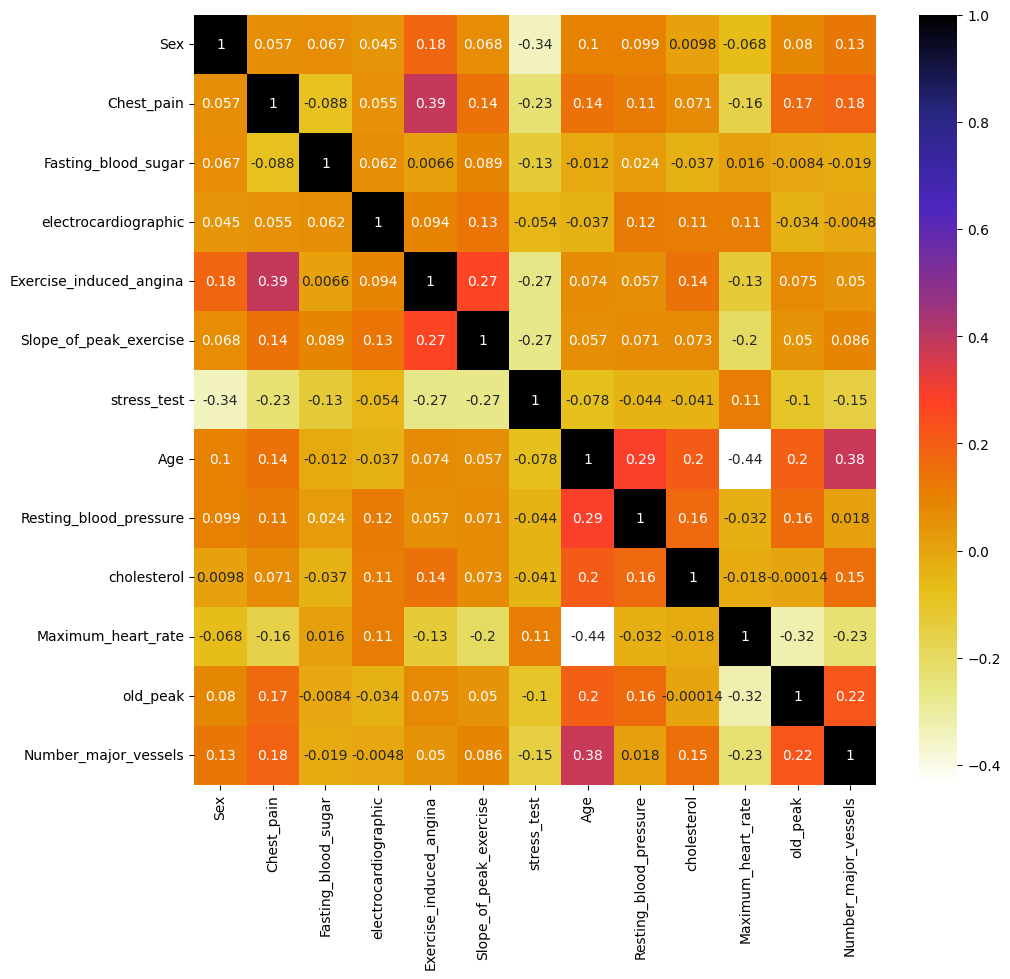

In [211]:
plt.figure(figsize=(11, 10))

correlation = T_df.corr()

sns.heatmap(correlation, annot=True, cmap=plt.cm.CMRmap_r)

In [212]:
def remove_strong_corr(data_set, corr):
    column = set()
    correlation = data_set.corr()

    for i in range(len(correlation.columns)):

        for j in range(i):
            if abs(correlation.iloc[i, j]) > corr:
                # is take the abs, because of negative correlatins, so if there is a big negative correlatins, that means that they are related
                column.add(correlation.columns[i])

    return column


correlated_columns = remove_strong_corr(T_df, corr=0.90)
len(correlated_columns)

0

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>There is no strong correlated columns </b><br>
    </span>    
</div>


# [8.0 Feature constuction](#8.0)


In [213]:
heart_df

,Age,Sex,Chest_pain,Resting_blood_pressure,cholesterol,Fasting_blood_sugar,electrocardiographic,Maximum_heart_rate,Exercise_induced_angina,old_peak,Slope_of_peak_exercise,Number_major_vessels,stress_test,Heart_disease
0,63,Male,Asymptomatic,145,233,True,Normal,150,No,2.3,Upsloping,0,Fixed defect,Heart Disease
1,37,Male,Non-anginal pain,130,250,False,Abnormality,187,No,3.5,Upsloping,0,Reversible defect,Heart Disease
2,41,Female,Atypical angina,130,204,False,Normal,172,No,1.4,Downsloping,0,Reversible defect,Heart Disease
3,56,Male,Atypical angina,120,236,False,Abnormality,178,No,0.8,Downsloping,0,Reversible defect,Heart Disease
4,57,Female,Typical angina,120,354,False,Abnormality,163,Yes,0.6,Downsloping,0,Reversible defect,Heart Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,Typical angina,140,241,False,Abnormality,123,Yes,0.2,Flat,0,Not described,No Disease
299,45,Male,Asymptomatic,110,264,False,Abnormality,132,No,1.2,Flat,0,Not described,No Disease
300,68,Male,Typical angina,144,193,True,Abnormality,141,No,3.4,Flat,2,Not described,No Disease
301,57,Male,Typical angina,130,131,False,Abnormality,115,Yes,1.2,Flat,1,Not described,No Disease


In [214]:
range_columns = [
    "Age",
    "Resting_blood_pressure",
    "cholesterol",
    "Fasting_blood_sugar",
    "Maximum_heart_rate",
]


for feature in range_columns:

    heart_df["range_" + feature] = heart_df["Age"].copy()

heart_df

,Age,Sex,Chest_pain,Resting_blood_pressure,cholesterol,Fasting_blood_sugar,electrocardiographic,Maximum_heart_rate,Exercise_induced_angina,old_peak,Slope_of_peak_exercise,Number_major_vessels,stress_test,Heart_disease,range_Age,range_Resting_blood_pressure,range_cholesterol,range_Fasting_blood_sugar,range_Maximum_heart_rate
0,63,Male,Asymptomatic,145,233,True,Normal,150,No,2.3,Upsloping,0,Fixed defect,Heart Disease,63,63,63,63,63
1,37,Male,Non-anginal pain,130,250,False,Abnormality,187,No,3.5,Upsloping,0,Reversible defect,Heart Disease,37,37,37,37,37
2,41,Female,Atypical angina,130,204,False,Normal,172,No,1.4,Downsloping,0,Reversible defect,Heart Disease,41,41,41,41,41
3,56,Male,Atypical angina,120,236,False,Abnormality,178,No,0.8,Downsloping,0,Reversible defect,Heart Disease,56,56,56,56,56
4,57,Female,Typical angina,120,354,False,Abnormality,163,Yes,0.6,Downsloping,0,Reversible defect,Heart Disease,57,57,57,57,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,Typical angina,140,241,False,Abnormality,123,Yes,0.2,Flat,0,Not described,No Disease,57,57,57,57,57
299,45,Male,Asymptomatic,110,264,False,Abnormality,132,No,1.2,Flat,0,Not described,No Disease,45,45,45,45,45
300,68,Male,Typical angina,144,193,True,Abnormality,141,No,3.4,Flat,2,Not described,No Disease,68,68,68,68,68
301,57,Male,Typical angina,130,131,False,Abnormality,115,Yes,1.2,Flat,1,Not described,No Disease,57,57,57,57,57


In [215]:
def age_construction(age):
    if age < 35:
        return 0
    if age < 45:
        return 1
    if age < 55:
        return 2
    if age < 65:
        return 3
    return 4


def Resting_blood_pressure_construction(Resting_blood_pressure_construction):
    if Resting_blood_pressure_construction < 115:
        return 0
    if Resting_blood_pressure_construction < 125:
        return 1
    if Resting_blood_pressure_construction < 135:
        return 2
    if Resting_blood_pressure_construction < 150:
        return 3
    return 4


def range_Fasting_blood_sugar_construction(range_Fasting_blood_sugar_construction):
    if range_Fasting_blood_sugar_construction < 40:
        return 0
    if range_Fasting_blood_sugar_construction < 50:
        return 1
    if range_Fasting_blood_sugar_construction < 60:
        return 2
    if range_Fasting_blood_sugar_construction < 70:
        return 3
    return 4


def range_cholesterol_construction(range_cholesterol):
    if range_cholesterol < 40:
        return 0
    if range_cholesterol < 50:
        return 1
    if range_cholesterol < 60:
        return 2
    if range_cholesterol < 70:
        return 3
    return 4


def range_Maximum_heart_rate_construction(range_Maximum_heart_rate):
    if range_Maximum_heart_rate < 40:
        return 0
    if range_Maximum_heart_rate < 50:
        return 1
    if range_Maximum_heart_rate < 60:
        return 2
    if range_Maximum_heart_rate < 70:
        return 3
    return 4


heart_df["range_Age"] = heart_df["range_Age"].apply(age_construction)
heart_df["range_Resting_blood_pressure"] = heart_df[
    "range_Resting_blood_pressure"
].apply(Resting_blood_pressure_construction)
heart_df["range_Fasting_blood_sugar"] = heart_df["range_Fasting_blood_sugar"].apply(
    range_Fasting_blood_sugar_construction
)
heart_df["range_Maximum_heart_rate"] = heart_df["range_Maximum_heart_rate"].apply(
    range_Maximum_heart_rate_construction
)

heart_df["range_cholesterol"] = heart_df["range_cholesterol"].apply(
    range_cholesterol_construction
)

In [216]:
heart_df

,Age,Sex,Chest_pain,Resting_blood_pressure,cholesterol,Fasting_blood_sugar,electrocardiographic,Maximum_heart_rate,Exercise_induced_angina,old_peak,Slope_of_peak_exercise,Number_major_vessels,stress_test,Heart_disease,range_Age,range_Resting_blood_pressure,range_cholesterol,range_Fasting_blood_sugar,range_Maximum_heart_rate
0,63,Male,Asymptomatic,145,233,True,Normal,150,No,2.3,Upsloping,0,Fixed defect,Heart Disease,3,0,3,3,3
1,37,Male,Non-anginal pain,130,250,False,Abnormality,187,No,3.5,Upsloping,0,Reversible defect,Heart Disease,1,0,0,0,0
2,41,Female,Atypical angina,130,204,False,Normal,172,No,1.4,Downsloping,0,Reversible defect,Heart Disease,1,0,1,1,1
3,56,Male,Atypical angina,120,236,False,Abnormality,178,No,0.8,Downsloping,0,Reversible defect,Heart Disease,3,0,2,2,2
4,57,Female,Typical angina,120,354,False,Abnormality,163,Yes,0.6,Downsloping,0,Reversible defect,Heart Disease,3,0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,Typical angina,140,241,False,Abnormality,123,Yes,0.2,Flat,0,Not described,No Disease,3,0,2,2,2
299,45,Male,Asymptomatic,110,264,False,Abnormality,132,No,1.2,Flat,0,Not described,No Disease,2,0,1,1,1
300,68,Male,Typical angina,144,193,True,Abnormality,141,No,3.4,Flat,2,Not described,No Disease,4,0,3,3,3
301,57,Male,Typical angina,130,131,False,Abnormality,115,Yes,1.2,Flat,1,Not described,No Disease,3,0,2,2,2


# [9.0 Encoding](#9.0)


### [9.1 Label encoding](#9.1)


In [217]:
mapper = {"Heart Disease": 1, "No Disease": 0}

heart_df["Heart_disease"] = heart_df["Heart_disease"].map(mapper)

### [9.2 OneHotEnconding](#9.2)


In [218]:
cat_columns = []

for i in heart_df.columns:
    if heart_df[i].dtype == "O" or heart_df[i].dtype == "bool":
        cat_columns.append(i)


final_heart_df = pd.get_dummies(heart_df, drop_first=True, columns=cat_columns)


for i in final_heart_df.columns:
    if final_heart_df[i].dtype == "bool":
        final_heart_df[i] = final_heart_df[i].astype("int32")

final_heart_df

,Age,Resting_blood_pressure,cholesterol,Maximum_heart_rate,old_peak,Number_major_vessels,Heart_disease,range_Age,range_Resting_blood_pressure,range_cholesterol,range_Fasting_blood_sugar,range_Maximum_heart_rate,Sex_Male,Chest_pain_Atypical angina,Chest_pain_Non-anginal pain,Chest_pain_Typical angina,Fasting_blood_sugar_True,electrocardiographic_Hypertrophy,electrocardiographic_Normal,Exercise_induced_angina_Yes,Slope_of_peak_exercise_Flat,Slope_of_peak_exercise_Upsloping,stress_test_Normal,stress_test_Not described,stress_test_Reversible defect
0,63,145,233,150,2.3,0,1,3,0,3,3,3,1,0,0,0,1,0,1,0,0,1,0,0,0
1,37,130,250,187,3.5,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
2,41,130,204,172,1.4,0,1,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1
3,56,120,236,178,0.8,0,1,3,0,2,2,2,1,1,0,0,0,0,0,0,0,0,0,0,1
4,57,120,354,163,0.6,0,1,3,0,2,2,2,0,0,0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,3,0,2,2,2,0,0,0,1,0,0,0,1,1,0,0,1,0
299,45,110,264,132,1.2,0,0,2,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0
300,68,144,193,141,3.4,2,0,4,0,3,3,3,1,0,0,1,1,0,0,0,1,0,0,1,0
301,57,130,131,115,1.2,1,0,3,0,2,2,2,1,0,0,1,0,0,0,1,1,0,0,1,0


In [219]:
heart_df = final_heart_df
heart_df

,Age,Resting_blood_pressure,cholesterol,Maximum_heart_rate,old_peak,Number_major_vessels,Heart_disease,range_Age,range_Resting_blood_pressure,range_cholesterol,range_Fasting_blood_sugar,range_Maximum_heart_rate,Sex_Male,Chest_pain_Atypical angina,Chest_pain_Non-anginal pain,Chest_pain_Typical angina,Fasting_blood_sugar_True,electrocardiographic_Hypertrophy,electrocardiographic_Normal,Exercise_induced_angina_Yes,Slope_of_peak_exercise_Flat,Slope_of_peak_exercise_Upsloping,stress_test_Normal,stress_test_Not described,stress_test_Reversible defect
0,63,145,233,150,2.3,0,1,3,0,3,3,3,1,0,0,0,1,0,1,0,0,1,0,0,0
1,37,130,250,187,3.5,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
2,41,130,204,172,1.4,0,1,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1
3,56,120,236,178,0.8,0,1,3,0,2,2,2,1,1,0,0,0,0,0,0,0,0,0,0,1
4,57,120,354,163,0.6,0,1,3,0,2,2,2,0,0,0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,3,0,2,2,2,0,0,0,1,0,0,0,1,1,0,0,1,0
299,45,110,264,132,1.2,0,0,2,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0
300,68,144,193,141,3.4,2,0,4,0,3,3,3,1,0,0,1,1,0,0,0,1,0,0,1,0
301,57,130,131,115,1.2,1,0,3,0,2,2,2,1,0,0,1,0,0,0,1,1,0,0,1,0


# [10.0 Splitting](#10.0)


In [220]:
features = heart_df.drop(columns=["Heart_disease"], axis=1)
test = heart_df["Heart_disease"]
x_train, x_test, y_train, y_test = train_test_split(
    features, test, test_size=0.35, random_state=42
)
x_train.shape, x_test.shape

((170, 24), (93, 24))

# [11.0 SGDClassifier (sgdc)](#11.0)


### [11.1 Build sgdc Model](#11.1)


In [221]:
def build_SGD(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test):
    train_score, test_score, used_alphas = [], [], []

    alpha = [
        0.000001,
        0.000002,
        0.00003,
        0.000003,
        0.00004,
        0.000004,
        0.00005,
        0.000005,
    ]
    alpha.sort()
    for alp in alpha:

        scaler = StandardScaler()
        SGD = SGDClassifier(loss="log_loss", penalty="l2", alpha=alp)

        pip = Pipeline(steps=[("StandardScaler", scaler), ("SGDClassifier", SGD)])

        pip.fit(x_train, y_train)

        train_acc = pip.score(x_train, y_train)
        test_acc = pip.score(x_test, y_test)
        train_score.append(train_acc)
        test_score.append(test_acc)
        used_alphas.append(alp)

    return train_score, test_score, used_alphas


train_score, test_score, used_alphas = build_SGD()

### [11.2 Evaluate sgdc Model](#11.2)


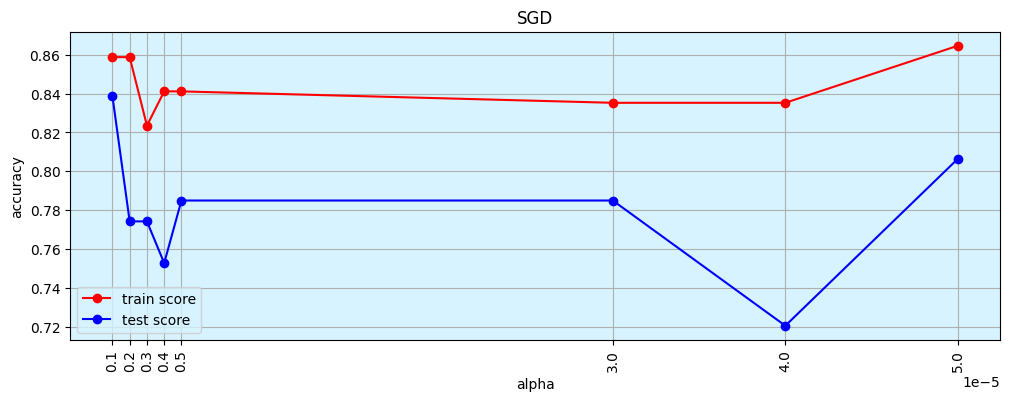

In [222]:
def evaluate_SGD(
    train_score=train_score, test_score=test_score, used_alphas=used_alphas
):
    plt.figure(figsize=(12, 4))

    plt.plot(used_alphas, train_score, color="red", marker="o", label="train score")
    plt.plot(used_alphas, test_score, color="blue", marker="o", label="test score")

    plt.xlabel("alpha")
    plt.ylabel("accuracy")
    plt.title("SGD")
    plt.grid(True)
    plt.xticks(used_alphas, rotation=90)
    plt.legend()
    plt.show()
    return


evaluate_SGD()

In [223]:
scaler = StandardScaler()
SGD = SGDClassifier(loss="log_loss", penalty="l2", alpha=0.0003)

pip = Pipeline(steps=[("StandardScaler", scaler), ("SGDClassifier", SGD)])

pip.fit(x_train, y_train)

train_acc = pip.score(x_train, y_train)
test_acc = pip.score(x_test, y_test)
train_acc, test_acc

(0.8588235294117647, 0.6666666666666666)

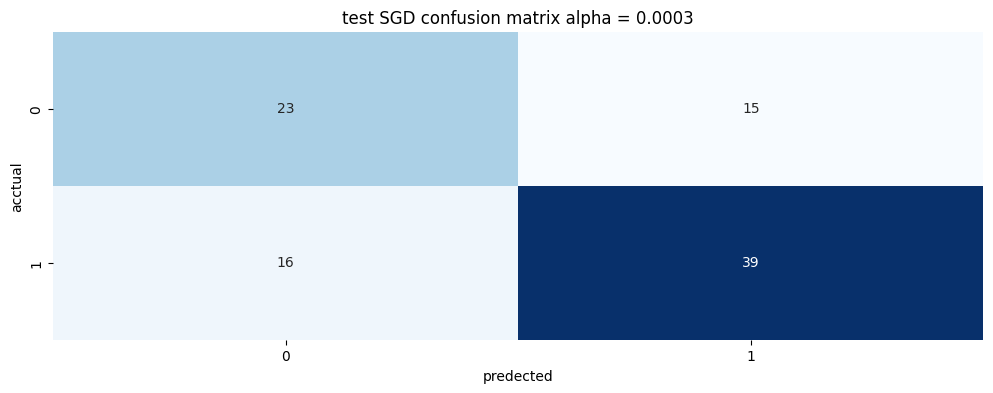

In [224]:
y_pred = pip.predict(x_test)

cm_SGD = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_SGD, annot=True, cmap="Blues", cbar=False)
plt.title("test SGD confusion matrix alpha = 0.0003")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

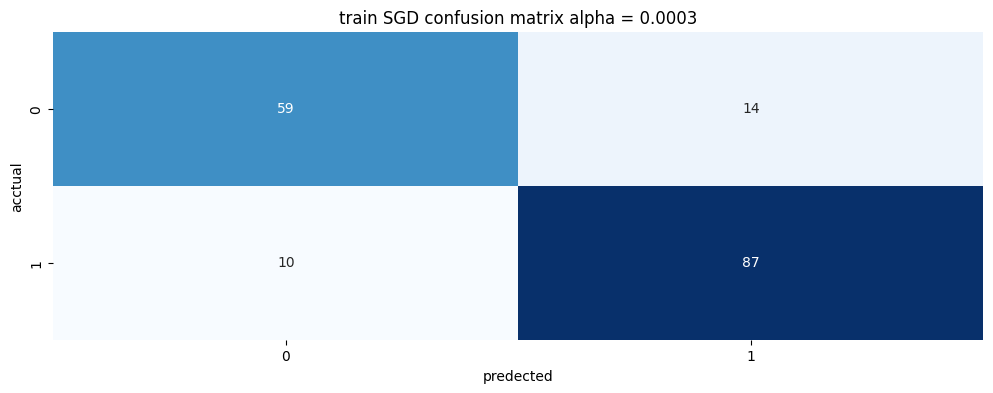

In [225]:
y_pred = pip.predict(x_train)

cm_SGD = confusion_matrix(y_true=y_train, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_SGD, annot=True, cmap="Blues", cbar=False)
plt.title("train SGD confusion matrix alpha = 0.0003")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

In [226]:
y_pred_train = pip.predict(x_train)
y_pred__test = pip.predict(x_test)

print("Classification Report - Train Data:")
print(classification_report(y_true=y_train, y_pred=y_pred_train))

print("Classification Report - Test Data:")
print(classification_report(y_true=y_test, y_pred=y_pred__test))

Classification Report - Train Data:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        73
           1       0.86      0.90      0.88        97

    accuracy                           0.86       170
   macro avg       0.86      0.85      0.85       170
weighted avg       0.86      0.86      0.86       170

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.59      0.61      0.60        38
           1       0.72      0.71      0.72        55

    accuracy                           0.67        93
   macro avg       0.66      0.66      0.66        93
weighted avg       0.67      0.67      0.67        93



# [12.0 SVMClassifier (svc))](#12.0)


### [12.1 Build svc Model](12.1)


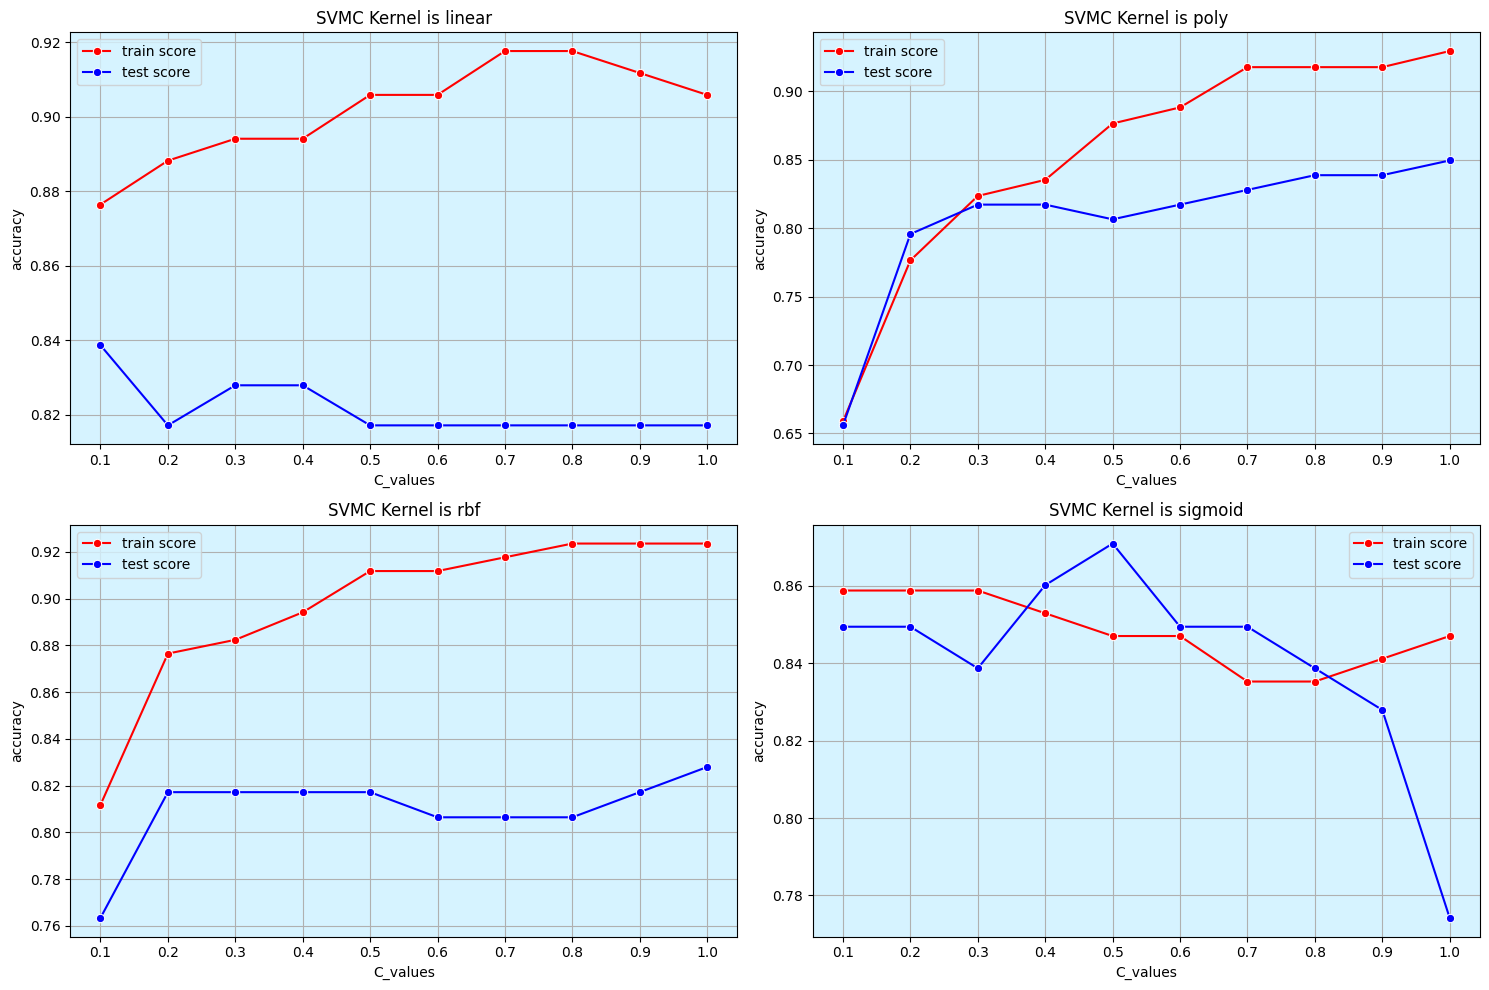

In [227]:
def build_SVM(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test):

    C_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    kernels = ["linear", "poly", "rbf", "sigmoid"]

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    for i, ker in enumerate(kernels):
        train_score, test_score = [], []
        for c in C_values:

            deg = 1
            if ker == "poly":
                deg = 3
            scaler = StandardScaler()
            svc = SVC(kernel=ker, C=c, degree=deg)

            pip = Pipeline(steps=[("StandardScaler", scaler), ("SVMClassifire", svc)])

            pip.fit(x_train, y_train)

            train_acc = pip.score(x_train, y_train)
            test_acc = pip.score(x_test, y_test)
            train_score.append(train_acc)
            test_score.append(test_acc)

        row = i // 2
        col = i % 2

        ax = axes[row, col]

        sns.lineplot(
            x=C_values,
            y=train_score,
            color="red",
            marker="o",
            label="train score",
            ax=ax,
        )
        sns.lineplot(
            x=C_values,
            y=test_score,
            color="blue",
            marker="o",
            label="test score",
            ax=ax,
        )

        ax.set_xlabel("C_values")
        ax.set_ylabel("accuracy")
        ax.set_title("SVMC Kernel is " + ker)
        ax.set_xticks(C_values)
        ax.grid(True)

    plt.tight_layout()
    plt.legend()
    plt.show()
    return train_score, test_score, used_alphas


train_score, test_score, used_alphas = build_SVM()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b> best kernel is sigmoid</b><br>
    </span>    
</div>


In [228]:
scaler = StandardScaler()
svc = SVC(kernel="sigmoid", C=0.5, degree=1)

pip = Pipeline(steps=[("StandardScaler", scaler), ("SVMClassifire", svc)])

pip.fit(x_train, y_train)

train_acc = pip.score(x_train, y_train)
test_acc = pip.score(x_test, y_test)
train_acc, test_acc

(0.8470588235294118, 0.8709677419354839)

### [12.2 Evaluate svc Model](#12.2)


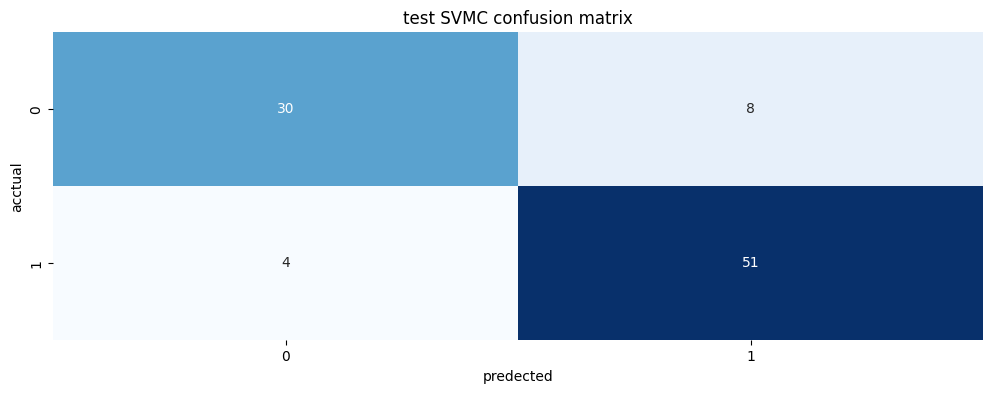

In [229]:
y_pred = pip.predict(x_test)

cm_SVMC = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_SVMC, annot=True, cmap="Blues", cbar=False)
plt.title("test SVMC confusion matrix")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

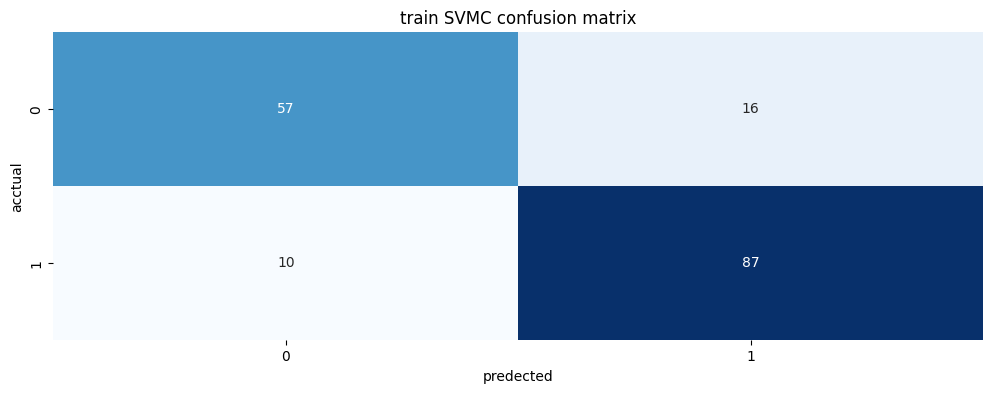

In [230]:
y_pred = pip.predict(x_train)

cm_SVMC = confusion_matrix(y_true=y_train, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_SVMC, annot=True, cmap="Blues", cbar=False)
plt.title("train SVMC confusion matrix")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

In [231]:
y_pred_train = pip.predict(x_train)
y_pred__test = pip.predict(x_test)

print("Classification Report - Train Data:")
print(classification_report(y_true=y_train, y_pred=y_pred_train))

print("Classification Report - Test Data:")
print(classification_report(y_true=y_test, y_pred=y_pred__test))

Classification Report - Train Data:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        73
           1       0.84      0.90      0.87        97

    accuracy                           0.85       170
   macro avg       0.85      0.84      0.84       170
weighted avg       0.85      0.85      0.85       170

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        38
           1       0.86      0.93      0.89        55

    accuracy                           0.87        93
   macro avg       0.87      0.86      0.86        93
weighted avg       0.87      0.87      0.87        93



# [13.0 Decision-Trees (DTsC)](#13.0)


### [13.1 Build DTsC Model](#13.1)


In [232]:
DTC = DecisionTreeClassifier(random_state=42)
DTC.fit(x_train, y_train)
DTC.score(x_train, y_train), DTC.score(x_test, y_test)

(1.0, 0.7419354838709677)

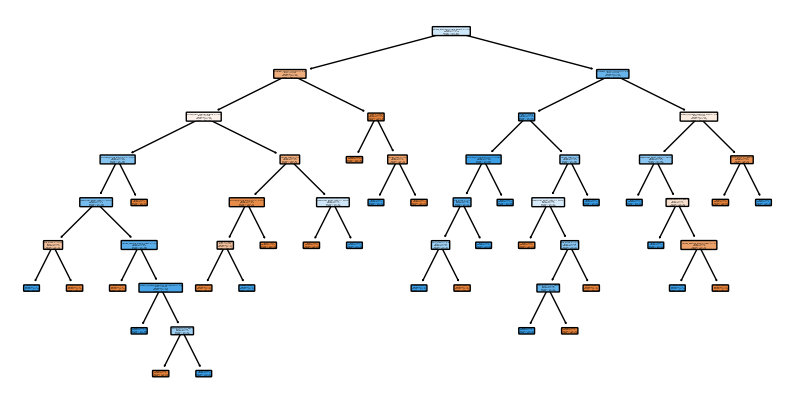

In [233]:
plt.figure(figsize=(10, 5))
plot_tree(
    DTC,
    class_names=["Yes HD", "No HD"],
    filled=True,
    rounded=True,
    feature_names=x_train.columns,
)
plt.show()

In [234]:
DTC.score(x_train, y_train), DTC.score(x_test, y_test)

(1.0, 0.7419354838709677)

In [235]:
path = DTC.cost_complexity_pruning_path(x_train, y_train)
alphas = path.ccp_alphas
alphas = alphas[:-1]

models = []

for alpha in alphas:
    DTC = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    DTC.fit(x_train, y_train)
    models.append(DTC)

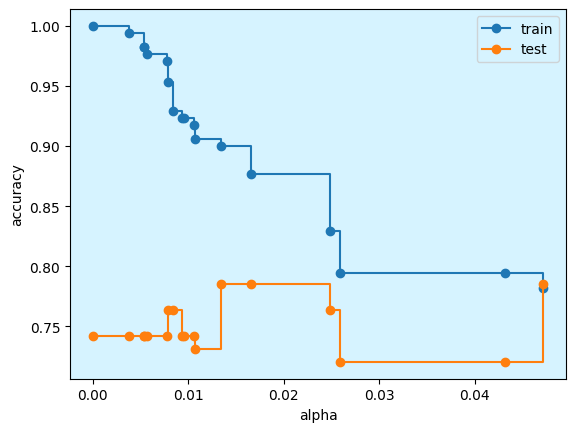

In [236]:
train_score = [DTC_.score(x_train, y_train) for DTC_ in models]
test_score = [DTC_.score(x_test, y_test) for DTC_ in models]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(alphas, train_score, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas, test_score, marker="o", label="test", drawstyle="steps-post")
plt.legend()
plt.show()

<Axes: xlabel='tree'>

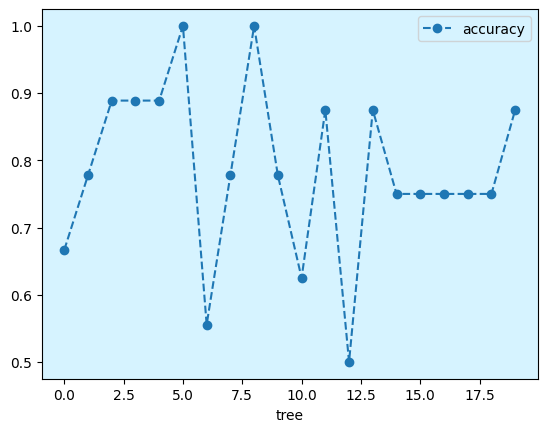

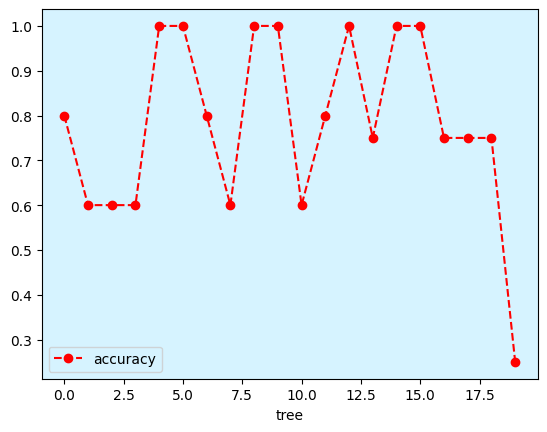

In [237]:
DTC = DecisionTreeClassifier(ccp_alpha=0.013, random_state=42)
score = cross_val_score(DTC, x_train, y_train, cv=20)
score2 = cross_val_score(DTC, x_test, y_test, cv=20)

df_ = pd.DataFrame(data={"tree": range(20), "accuracy": score})
df_2 = pd.DataFrame(data={"tree": range(20), "accuracy": score2})

df_.plot(x="tree", y="accuracy", linestyle="--", marker="o")
df_2.plot(x="tree", y="accuracy", linestyle="--", marker="o", color="red")

<Axes: xlabel='alpha'>

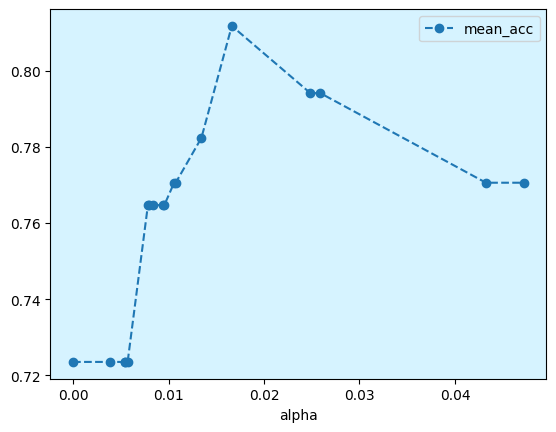

In [238]:
path = DTC.cost_complexity_pruning_path(x_train, y_train)
alphas = path.ccp_alphas
alphas = alphas[:-1]

models = []

for alpha in alphas:
    DTC = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    score = cross_val_score(DTC, x_train, y_train, cv=5)
    models.append([alpha, np.mean(score), np.std(score)])

alpha_results = pd.DataFrame(models, columns=["alpha", "mean_acc", "std"])

alpha_results.plot(x="alpha", y="mean_acc", linestyle="--", marker="o")

In [239]:
alpha = alpha_results[
    (alpha_results["alpha"] > 0.01) & (alpha_results["alpha"] < 0.02)
]["alpha"]
alpha

10    0.010588
11    0.010756
12    0.013445
13    0.016629
Name: alpha, dtype: float64

In [240]:
DTC_pruned = DecisionTreeClassifier(ccp_alpha=0.016629, random_state=42)
DTC_pruned.fit(x_train, y_train)
DTC_pruned.score(x_train, y_train), DTC_pruned.score(x_test, y_test)

(0.8764705882352941, 0.7849462365591398)

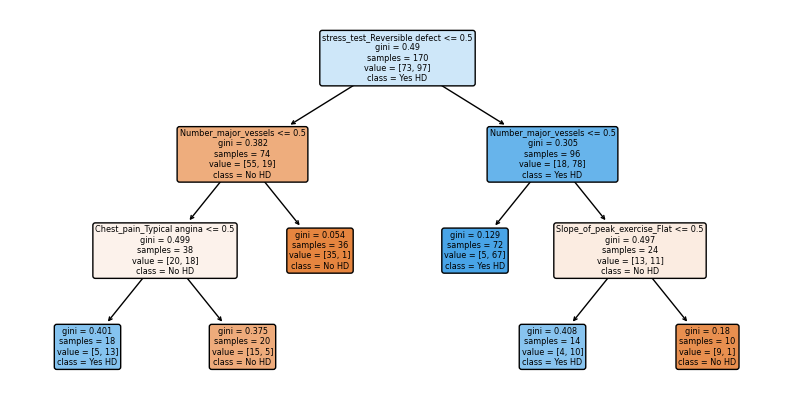

In [241]:
plt.figure(figsize=(10, 5))
plot_tree(
    DTC_pruned,
    class_names=["No HD", "Yes HD"],
    filled=True,
    rounded=True,
    feature_names=x_train.columns,
)
plt.show()

### [13.2 Evaluate DTsC Model](#13.2)


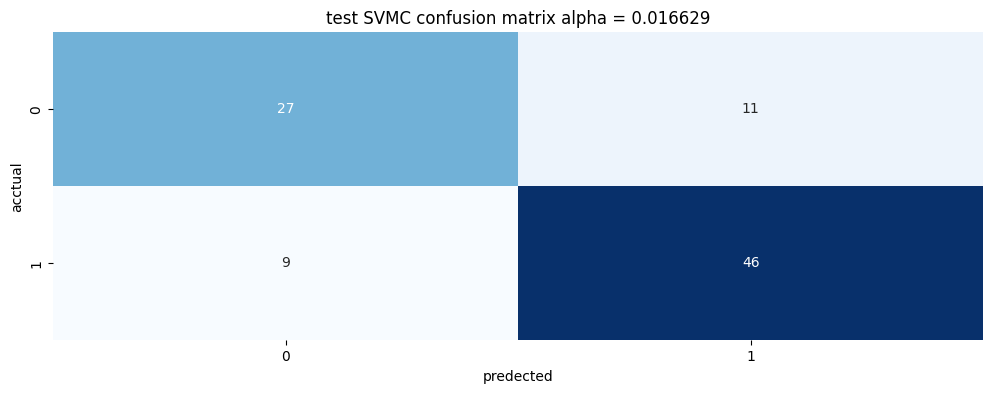

In [242]:
y_pred = DTC_pruned.predict(x_test)

cm_DTC_pruned = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_DTC_pruned, annot=True, cmap="Blues", cbar=False)
plt.title("test SVMC confusion matrix alpha = 0.016629")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

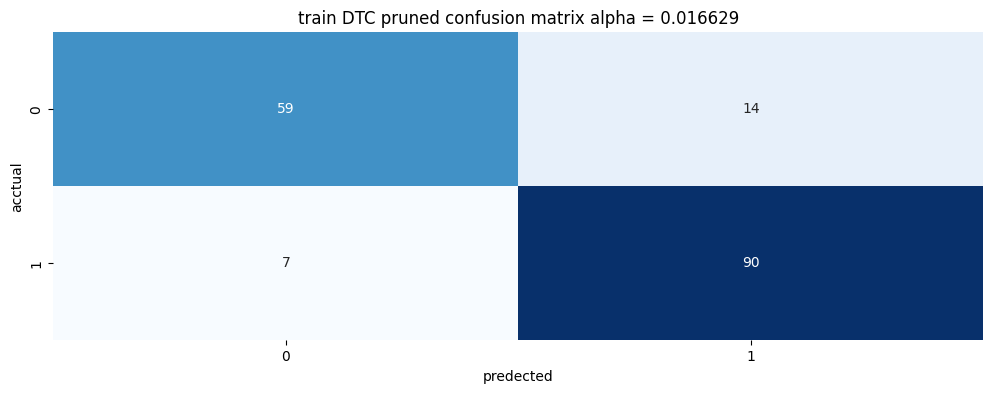

In [243]:
y_pred = DTC_pruned.predict(x_train)

cm_DTC_pruned = confusion_matrix(y_true=y_train, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_DTC_pruned, annot=True, cmap="Blues", cbar=False)
plt.title("train DTC pruned confusion matrix alpha = 0.016629")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

In [244]:
y_pred_train = DTC_pruned.predict(x_train)
y_pred__test = DTC_pruned.predict(x_test)

print("Classification Report - Train Data:")
print(classification_report(y_true=y_train, y_pred=y_pred_train))

print("Classification Report - Test Data:")
print(classification_report(y_true=y_test, y_pred=y_pred__test))

Classification Report - Train Data:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        73
           1       0.87      0.93      0.90        97

    accuracy                           0.88       170
   macro avg       0.88      0.87      0.87       170
weighted avg       0.88      0.88      0.88       170

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        38
           1       0.81      0.84      0.82        55

    accuracy                           0.78        93
   macro avg       0.78      0.77      0.78        93
weighted avg       0.78      0.78      0.78        93



# [14.0 RandomForestClassifier (RFC)](#14.0)

- [14.2 Evaluate RFC Model](#14.2)


### - [5.1 Build RFC Model](#5.1)


In [245]:
RF = RandomForestClassifier(n_estimators=50, random_state=45)
RF.fit(x_train, y_train)
RF.score(x_train, y_train), RF.score(x_test, y_test)

(1.0, 0.8279569892473119)

In [246]:
param_grid = {
    "max_depth": [25, 30, 31],
    "min_samples_split": [2, 4, 5, 6, 10],
    "min_samples_leaf": [1, 2, 3, 6],
    "ccp_alpha": [0.00001, 0.0000001, 0.00013],
}

RF = RandomForestClassifier(n_estimators=50, random_state=45)


optimized_ridge = GridSearchCV(
    estimator=RF,
    param_grid=param_grid,
    cv=5,
    verbose=3,
)
optimized_ridge.fit(x_train, y_train)

print("best_params_", optimized_ridge.best_params_)
print("best score", optimized_ridge.best_score_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END ccp_alpha=1e-05, max_depth=25, min_samples_leaf=1, min_samples_split=2;, score=0.794 total time=   0.0s
[CV 2/5] END ccp_alpha=1e-05, max_depth=25, min_samples_leaf=1, min_samples_split=2;, score=0.912 total time=   0.0s
[CV 3/5] END ccp_alpha=1e-05, max_depth=25, min_samples_leaf=1, min_samples_split=2;, score=0.735 total time=   0.0s
[CV 4/5] END ccp_alpha=1e-05, max_depth=25, min_samples_leaf=1, min_samples_split=2;, score=0.824 total time=   0.0s
[CV 5/5] END ccp_alpha=1e-05, max_depth=25, min_samples_leaf=1, min_samples_split=2;, score=0.824 total time=   0.0s
[CV 1/5] END ccp_alpha=1e-05, max_depth=25, min_samples_leaf=1, min_samples_split=4;, score=0.853 total time=   0.0s
[CV 2/5] END ccp_alpha=1e-05, max_depth=25, min_samples_leaf=1, min_samples_split=4;, score=0.882 total time=   0.0s
[CV 3/5] END ccp_alpha=1e-05, max_depth=25, min_samples_leaf=1, min_samples_split=4;, score=0.765 total time=   0.0s
[

In [247]:
RF = RandomForestClassifier(
    n_estimators=50,
    random_state=45,
    ccp_alpha=1e-05,
    max_depth=25,
    min_samples_leaf=1,
    min_samples_split=4,
)
RF.fit(x_train, y_train)

RandomForestClassifier(ccp_alpha=1e-05, max_depth=25, min_samples_split=4,
                       n_estimators=50, random_state=45)

In [248]:
RF.score(x_train, y_train), RF.score(x_test, y_test)

(0.9941176470588236, 0.8387096774193549)

### [14.2 Evaluate RFC Model](#14.2)


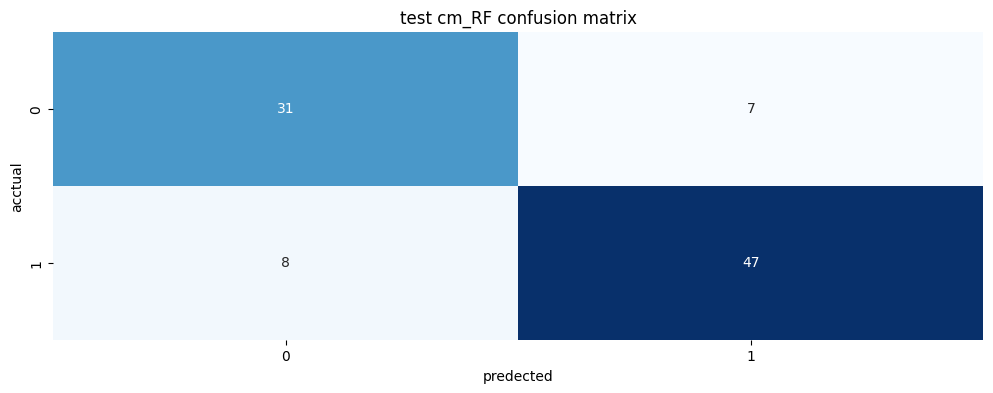

In [249]:
y_pred = RF.predict(x_test)

cm_RF = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_RF, annot=True, cmap="Blues", cbar=False)
plt.title("test cm_RF confusion matrix")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

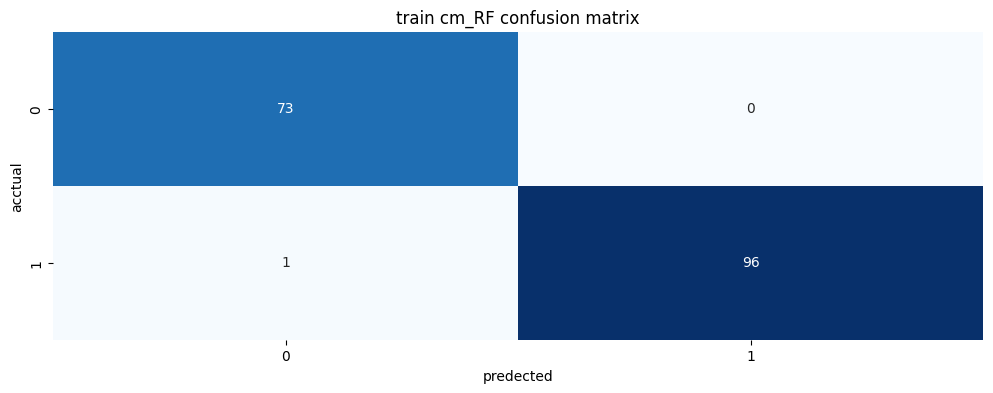

In [250]:
y_pred = RF.predict(x_train)

cm_RF = confusion_matrix(y_true=y_train, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_RF, annot=True, cmap="Blues", cbar=False)
plt.title("train cm_RF confusion matrix")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

In [251]:
y_pred_train = RF.predict(x_train)
y_pred__test = RF.predict(x_test)

print("Classification Report - Train Data:")
print(classification_report(y_true=y_train, y_pred=y_pred_train))

print("Classification Report - Test Data:")
print(classification_report(y_true=y_test, y_pred=y_pred__test))

Classification Report - Train Data:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        73
           1       1.00      0.99      0.99        97

    accuracy                           0.99       170
   macro avg       0.99      0.99      0.99       170
weighted avg       0.99      0.99      0.99       170

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        38
           1       0.87      0.85      0.86        55

    accuracy                           0.84        93
   macro avg       0.83      0.84      0.83        93
weighted avg       0.84      0.84      0.84        93



# [15.0 VottingSystemClassifier (VSC)](#15.0)


In [252]:
scaler = StandardScaler()
SGD = SGDClassifier(loss="log_loss", penalty="l2", alpha=0.0003)

SGD_pip = Pipeline(steps=[("StandardScaler", scaler), ("SGDClassifier", SGD)])


scaler = StandardScaler()
svc = SVC(kernel="sigmoid", C=0.5, degree=1)

svc_pip = Pipeline(steps=[("StandardScaler", scaler), ("SVMClassifire", svc)])


DTC_pruned = DecisionTreeClassifier(ccp_alpha=0.016629, random_state=42)

RF = RandomForestClassifier(
    n_estimators=50,
    random_state=45,
    ccp_alpha=1e-05,
    max_depth=25,
    min_samples_leaf=1,
    min_samples_split=4,
)


vot = VotingClassifier(
    estimators=[
        ("SGD_pip", SGD_pip),
        ("svc_pip", svc_pip),
        ("DTC_pruned", DTC_pruned),
        ("RF", RF),
    ]
)
vot.fit(x_train, y_train)
vot.score(x_train, y_train), vot.score(x_test, y_test)

(0.9235294117647059, 0.8279569892473119)